# **MSc Project**

# **Sentiment Analysis and Visualization on Amazon Product Reviews**

###Importing the required Libraries

In [1]:
#Importing most of the required Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import sqlite3
from nltk.tokenize import word_tokenize
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import warnings
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
from IPython.display import HTML

def pretty_print_df(value_counts_):
    "This is a function to display the results nicely."
    display(HTML(pd.DataFrame(value_counts_).to_html()))#creates an HTML table that contains a representation of the data in the DataFrame.



###Loading the Amazon Dataset

In [10]:
#Uploading the dataset with Amazon customer reviews from Kaggle.
uploaded = files.upload() #uploading the dataset file from computer to Google Colab
Amazon_Dataset = pd.read_csv('Amazon_Reviews.csv')

Saving Amazon_Reviews.csv to Amazon_Reviews (1).csv


<ipython-input-10-1525458650ae>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon_Dataset = pd.read_csv('Amazon_Reviews.csv')


###Converting the Date values to a datetime format.
The conversion in this format is important as it ensures the date values are stored in the correct format to prevent errors.

In [11]:
#Converting the columns with Dates to a DateTime format.
Amazon_Dataset['DateOfReview'] = pd.to_datetime(Amazon_Dataset['DateOfReview']).dt.date#date
Amazon_Dataset['DateOfReview'] = pd.to_datetime(Amazon_Dataset['DateOfReview'])#both date and time
Amazon_Dataset['ReviewAddedDate'] = pd.to_datetime(Amazon_Dataset['ReviewAddedDate']).dt.date
Amazon_Dataset['ReviewAddedDate'] = pd.to_datetime(Amazon_Dataset['ReviewAddedDate'])

# **Exploratory Data Analysis (EDA)**

The purpose of EDA is to analyze the dataset and discover all its components. This enables to find useful information and identify  patterns and trends in the dataset. EDA can be both graphical and non-graphical as shown below.

###Dimensions of the dataset
The purpose of this non-graphical EDA is to find the dimensions of the dataset, which refers to the number of input variables, observations, and values in a dataset. This EDA helps to know if the quantity of data is enough for the task and it also helps in feature selection.

In [6]:
print("The dimensions of the dataset is:",Amazon_Dataset.shape) #variables and observations

The dimensions of the dataset is: (34657, 16)


Above, it can be seen that there are 34657 observations and 16 variables in the Amazon dataset.

###Random oberservations from the Amazon Dataset
The purpose of this EDA is to visually see the dataset's variables, obersations and some of the values. Through this EDA the datatypes of the variables can also be known.

From the results below, it can be noticed that there are NaN/Missing values. It can also be seen that there are 2 columns that contains Dates and 1 column with boolen value. Rest of the columns are either strings, float or integer.

In [7]:
Amazon_Dataset.sample(n=7) #Displaying 7 random observations.

ID  \
24443  AVpfl8cLLJeJML43AE3S   
5357   AVphgVaX1cnluZ0-DR74   
24586  AVpfl8cLLJeJML43AE3S   
19820  AV1YnRtnglJLPUi8IJmV   
27694  AVpfl8cLLJeJML43AE3S   
6079   AVphgVaX1cnluZ0-DR74   
26061  AVpfl8cLLJeJML43AE3S   

                                            Product_Name  \
24443                 Echo (White),,,\r\nEcho (White),,,   
5357   Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...   
24586                 Echo (White),,,\r\nEcho (White),,,   
19820  Amazon Kindle Paperwhite - eBook reader - 4 GB...   
27694             Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,   
6079   Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...   
26061             Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,   

                       asins   Brand  \
24443  B00L9EPT8O,B01E6AO69U  Amazon   
5357              B018Y229OU  Amazon   
24586  B00L9EPT8O,B01E6AO69U  Amazon   
19820             B00OQVZDJM  Amazon   
27694  B00L9EPT8O,B01E6AO69U  Amazon   
6079              B018Y229OU  Amazon   
26061  B00L9EPT8O,B01E6AO69U  Amazon   

                                              Categories  \
24443  Stereos,Remote Controls,Amazon Echo,Audio Dock...   
5357   Fire Tablets,Tablets,Computers & Tablets,All T...   
24586  Stereos,Remote Controls,Amazon Echo,Audio Dock...   
19820  Walmart for Business,Office Electronics,Tablet...   
27694  Stereos,Remote Controls,Amazon Echo,Audio Dock...   
6079   Fire Tablets,Tablets,Computers & Tablets,All T...   
26061  Stereos,Remote Controls,Amazon Echo,Audio Dock...   

                                                    Keys Manufacturer  \
24443  echowhite/263039693056,echowhite/152558276095,...       Amazon   
5357   firetablet7displaywifi8gbincludesspecialoffers...       Amazon   
24586  echowhite/263039693056,echowhite/152558276095,...       Amazon   
19820  amazon/b00oqvzdjm,848719056099,amazonkindlepap...       Amazon   
27694  echowhite/263039693056,echowhite/152558276095,...       Amazon   
6079   firetablet7displaywifi8gbincludesspecialoffers...       Amazon   
26061  echowhite/263039693056,echowhite/152558276095,...       Amazon   

      DateOfReview ReviewAddedDate ReviewRecommended  No_Of_HelpfulReviews  \
24443   2016-10-29             NaT             False                   0.0   
5357    2016-05-31      2017-05-21              True                   0.0   
24586   2016-11-16             NaT              True                   0.0   
19820   2017-08-17      2017-09-05              True                   0.0   
27694   2016-06-24             NaT              True                   0.0   
6079    2016-05-27      2017-05-21              True                   1.0   
26061   2017-02-24             NaT              True                   0.0   

       Rating                                         Review_URL  \
24443     2.0  http://reviews.bestbuy.com/3545/5588528/review...   
5357      5.0  http://reviews.bestbuy.com/3545/5025800/review...   
24586     5.0  http://reviews.bestbuy.com/3545/5588528/review...   
19820     5.0  http://reviews.bestbuy.com/3545/9439005/review...   
27694     5.0  http://reviews.bestbuy.com/3545/5588528/review...   
6079      5.0  http://reviews.bestbuy.com/3545/5025800/review...   
26061     5.0  http://reviews.bestbuy.com/3545/5588528/review...   

                                             Review_Text  \
24443  The one thing i had an issue with,is I would l...   
5357   I used a couple of the brands that are just pr...   
24586  I LOVE love love my echo! I have one in the ki...   
19820  I love my Kindle paperwhite. The backlit scree...   
27694  Works with all my stuff. Speak and she shall c...   
6079   This is the best tablet you can get under $50,...   
26061  Excellent product great for information and mu...   

                            Review_Title      ReviewerName  
24443                    Gets very loud.           Skorepo  
5357         Great tablet for a starter.           gremlin  
24586                Buy the Amazon Echo  MotherOnaMission  
19820        

###Time Frame of Date of Review
The purpose of this EDA is to find the relevance and validity of the reviews.

From the results below, it can be seen that the customer reviews exists from the year 2010 to 2018. This shows that the dataset contains customer review of 8 years.

In [8]:
#Generating descriptive statistics of DateOfReview column.
Amazon_Dataset[['DateOfReview']].describe()

<ipython-input-8-e94f0e4d2d99>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Amazon_Dataset[['DateOfReview']].describe()


DateOfReview
count                 34618
unique                 1045
top     2017-01-16 00:00:00
freq                    710
first   2010-07-09 00:00:00
last    2018-04-18 00:00:00

###Checking for Duplicated Customer Reviews
The purpose of this is to find if there are any duplicated reviews.

It can be seen below, that there are no duplicated customer reviews.

In [9]:
Amazon_Dataset["Review_Text"].duplicated().sum() #Finding sum of duplicated customer reviews.

0

###Dataset Summary
The purpose of the EDA's is to find if any variable contains any null values.




Below, it can be seen that many variables have missing values.

In [10]:
#Amazon Dataset Summary
Amazon_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34657 entries, 0 to 34656
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    34657 non-null  object        
 1   Product_Name          27900 non-null  object        
 2   asins                 34655 non-null  object        
 3   Brand                 34657 non-null  object        
 4   Categories            34657 non-null  object        
 5   Keys                  34657 non-null  object        
 6   Manufacturer          34657 non-null  object        
 7   DateOfReview          34618 non-null  datetime64[ns]
 8   ReviewAddedDate       24036 non-null  datetime64[ns]
 9   ReviewRecommended     34063 non-null  object        
 10  No_Of_HelpfulReviews  34128 non-null  float64       
 11  Rating                34624 non-null  float64       
 12  Review_URL            34657 non-null  object        
 13  Review_Text     

In [11]:
#Finding the sum of NaN values of each variable in Amazon Dataset
Amazon_Dataset.isnull().sum()

ID                          0
Product_Name             6757
asins                       2
Brand                       0
Categories                  0
Keys                        0
Manufacturer                0
DateOfReview               39
ReviewAddedDate         10621
ReviewRecommended         594
No_Of_HelpfulReviews      529
Rating                     33
Review_URL                  0
Review_Text                 1
Review_Title                5
ReviewerName                2
dtype: int64

The Review_Text variable has one missing value and as it is the main variable of the task, and as the number of missing value is just 1, I have dropped this row in order to prevent errors when models are run as some models only accept string values and not null values.

###Dropping the null Review Text oberservation


In [12]:
#Finding the observation with NaN value in the 'Review_Text' variable
#NaN is represented as a float in Pandas
NullRow = Amazon_Dataset[Amazon_Dataset['Review_Text'].apply(lambda x: isinstance(x, float))]
NullRow

ID                                       Product_Name  \
3111  AVsRjfwAU2_QcyX9PHqe  Amazon 5W USB Official OEM Charger and Power A...   

           asins   Brand                                         Categories  \
3111  B01J2G4VBG  Amazon  Amazon Devices & Accessories,Amazon Device Acc...   

                                                   Keys Manufacturer  \
3111  0841667120171,841667120171,amazon5wusbofficial...       Amazon   

     DateOfReview ReviewAddedDate ReviewRecommended  No_Of_HelpfulReviews  \
3111   2017-04-17             NaT               NaN                   NaN   

      Rating                                         Review_URL Review_Text  \
3111     5.0  https://www.amazon.com/product-reviews/B01J2G4...         NaN   

     Review_Title       ReviewerName  
3111   Five Stars  lawrence s martin

In [13]:
#Dropping the observation with NaN value.
Amazon_Dataset = Amazon_Dataset[Amazon_Dataset['ID'] != 'AVsRjfwAU2_QcyX9PHqe']

###The occurrence for each Rating (1-5)
The purpose of this EDA is to find the distribution of Ratings in the Amazon Dataset to get an overall idea of which rating is the highest or lowest.



It can be seen that the highest occurrence of Rating in the dataset is of Rating 5 of 68.6%.

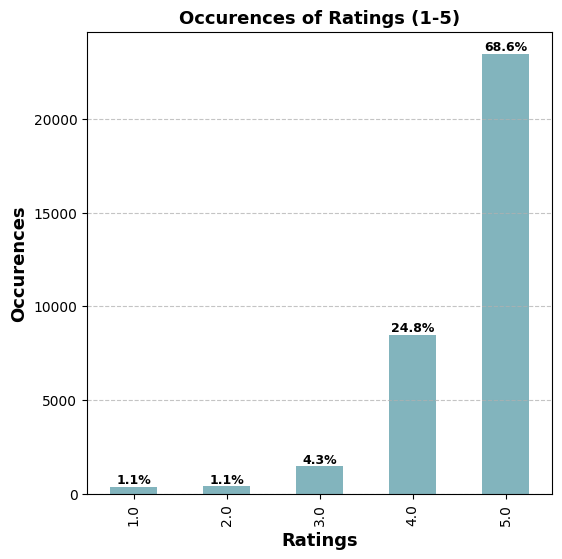

In [14]:
RatingCounts = Amazon_Dataset['Rating'].value_counts().sort_index() #selecting column Rating

# Calculating the sum of occurrences
total_occurrences = RatingCounts.sum()

# Calculating the % for each Ratings
rating_percentages = RatingCounts / total_occurrences * 100

Ratingocc = RatingCounts.plot(kind='bar', figsize=(6, 6), color='#82b4bd') #plotting the bar chart
Ratingocc.set_title('Occurences of Ratings (1-5)', fontweight='bold', fontsize=13)
Ratingocc.set_xlabel('Ratings', fontweight='bold', fontsize=13)
Ratingocc.set_ylabel('Occurences', fontweight='bold', fontsize=13)

# Display Percentages of occurrences.
for i, (rating, count) in enumerate(RatingCounts.items()):
    rating_occ_percentage = rating_percentages[rating]
    Ratingocc.text(i, count, f'{rating_occ_percentage:.1f}%', ha='center', va='bottom', fontsize=9,fontweight='bold') # i and count are coordinates of the plot, ha and va is center and vertical alignment of the % position.

plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.show()

###Distribution of Brands and Manufacturers.
The purpose is to identify how many brands and manufacturers exists in the dataset, and does any specific brand or manufacturer have any domainance over another.

It can be seen that there are 6 Brands and 2 Manufacturers.

In [15]:
BandM = ['Brand', 'Manufacturer']
for column in BandM:
  print(f"The number of cccurrences for {column}")
  pretty_print_df(Amazon_Dataset[column].value_counts())
  print()

The number of cccurrences for Brand



The number of cccurrences for Manufacturer


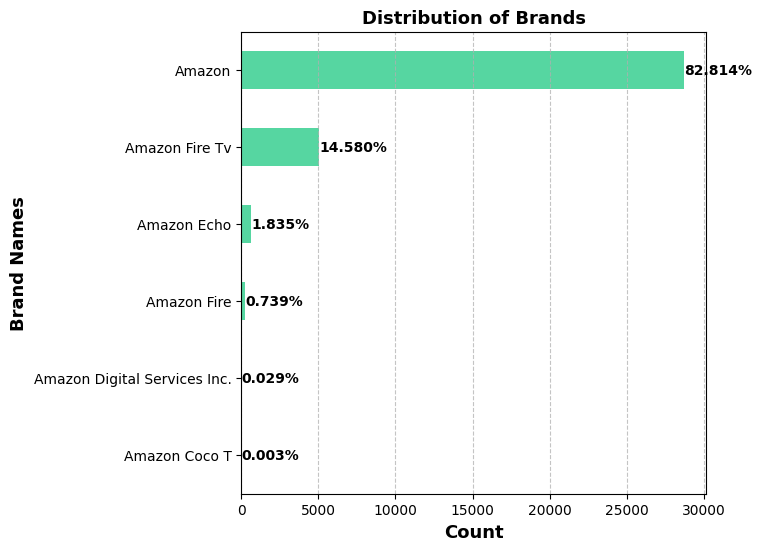

In [7]:
RatingCounts = Amazon_Dataset['Brand'].value_counts().sort_index() # Selecting column Rating

# Calculating the sum of occurrences
total_occurrences = RatingCounts.sum()

# Calculating the % for each Ratings
rating_percentages = RatingCounts / total_occurrences * 100

# Sort in ascending order
RatingCounts = RatingCounts.sort_values()

Ratingocc = RatingCounts.plot(kind='barh', figsize=(6, 6), color='#56d6a1') # Plotting the horizontal bar chart
Ratingocc.set_title('Distribution of Brands', fontweight='bold', fontsize=13)
Ratingocc.set_xlabel('Count', fontweight='bold', fontsize=13)
Ratingocc.set_ylabel('Brand Names', fontweight='bold', fontsize=13)

# Display %
for i, (rating, count) in enumerate(RatingCounts.items()):
    rating_occ_percentage = rating_percentages[rating]
    Ratingocc.text(count, i, f'{rating_occ_percentage:.3f}%', ha='left', va='center', fontsize=10,fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.show()


###Distribution of Rating by Brand
The purpose of this EDA is to visually see the distribution of rating of each brand.

In [17]:
brand_rating_counts = Amazon_Dataset.groupby(['Brand', 'Rating']).size().unstack(fill_value=0)
brand_rating_counts

Rating                        1.0  2.0   3.0   4.0    5.0
Brand                                                    
Amazon                        322  345  1299  7333  18968
Amazon Digital Services Inc.    3    0     1     1      5
Amazon Echo                    11   13    29   157    426
Amazon Fire                     6    2    13    57    178
Amazon Fire Tv                 41   32   137   946   3897

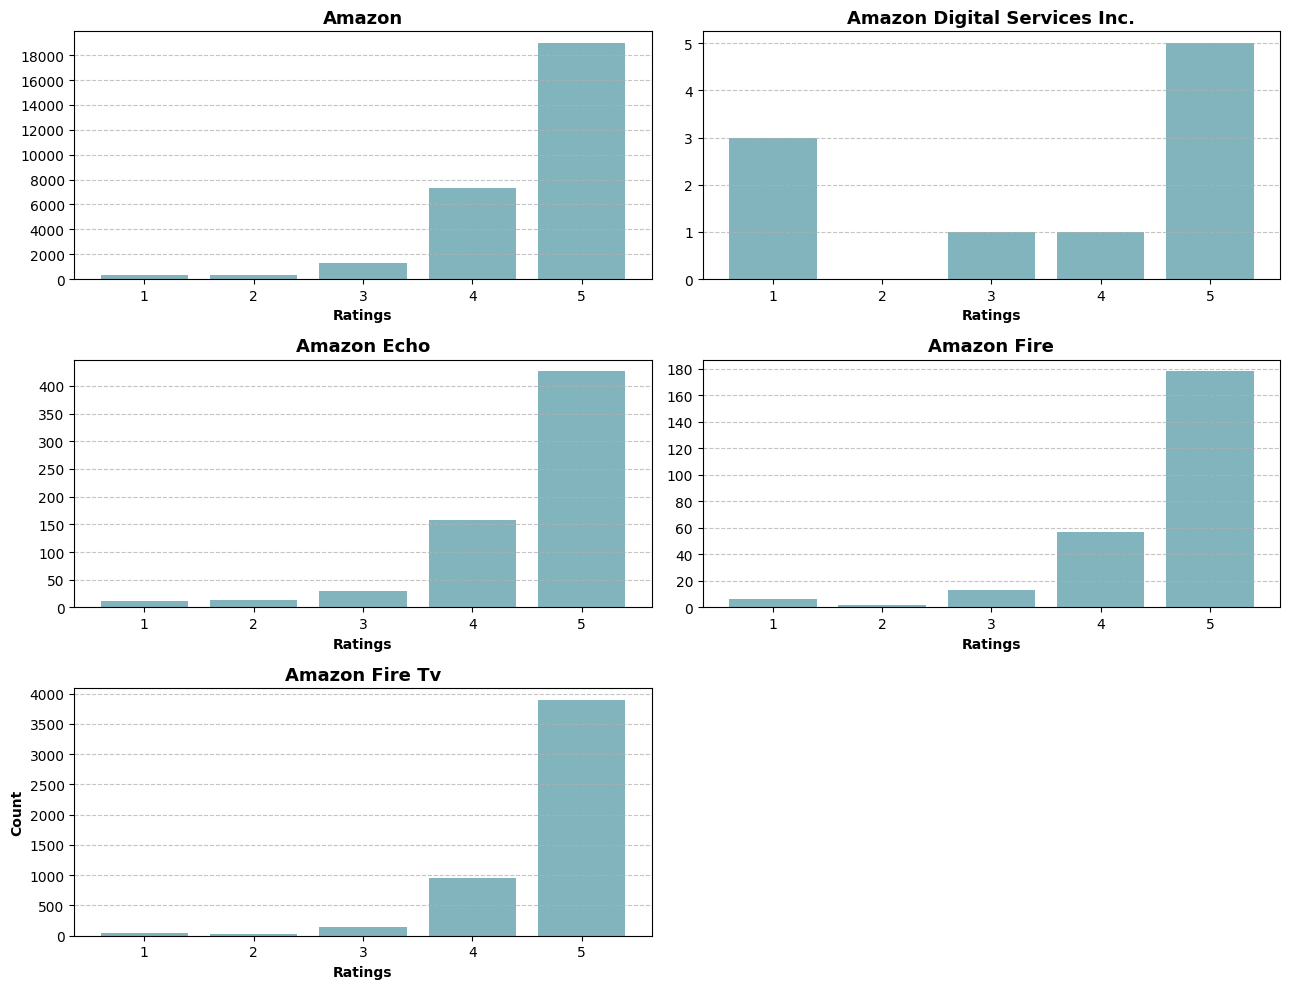

In [18]:
Ratings = [1, 2, 3, 4, 5]#Rating values
# Grouping by Brand and Rating to count the occurrences of each Rating by Brand
BrandRating = Amazon_Dataset.groupby(['Brand', 'Rating']).size().unstack(fill_value=0)#Grouping data based on Brand and Rating. The size() counts the number of occurrences of each combination. The fill_value fills the null values with 0

selective_brands = ['Amazon', 'Amazon Digital Services Inc.', 'Amazon Echo', 'Amazon Fire', 'Amazon Fire Tv']#Brands
num_brands = len(selective_brands)

fig, axes = plt.subplots(3, 2, figsize=(13, 10))
#The axes array can be flattened to change it from a grid structure to a linear structure, which makes it simpler to loop through the subplots.
axes = axes.flatten()
for i, (brand, data) in enumerate(BrandRating.iterrows()):
    axes[i].bar(Ratings, data, color='#82b4bd')
    axes[i].set_title(brand, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Ratings', fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.75)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))# MaxNLocator is a python library and it configures the tick markers on the y-axis of the subplot
for i in range(num_brands, 3 * 2):
    fig.delaxes(axes[i])#remove any empty or unused subplots from the figure.The delaxes() method is a function used to remove subplot.
axes[num_brands - 1].set_ylabel('Count', fontweight='bold')

#Spacing between subplots
plt.tight_layout()
plt.show()

It can be seen that the brand Amazon has the highest number of rating of 5 compared to other brands.

###Word Cloud of Product Categories
The purpose of this EDA is to visually see the most used words in each variable.
The size of each word in a word cloud, shows its frequency or significance. So it can be said that the words with the biggest size are the categories in the dataset with the highest number of reviews.

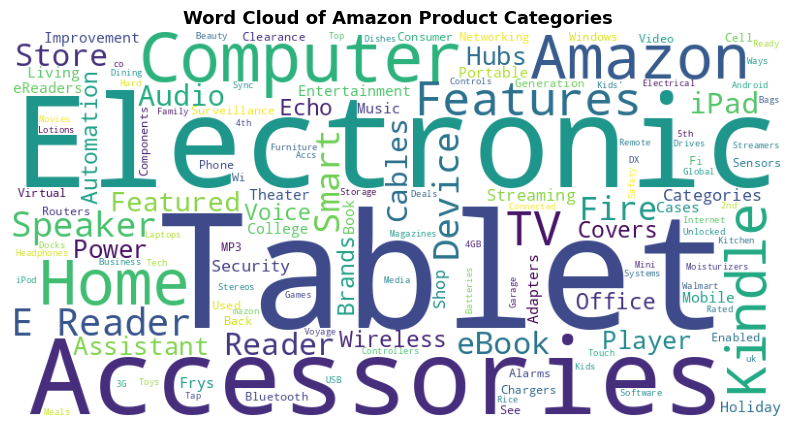

In [19]:
# Concatenate categories to a one string
CategoryText = ' '.join(Amazon_Dataset['Categories'])

# Split the CategoryText into individual words
words = CategoryText.split()
#converts the words list into a set, which automatically eliminates duplicate words, leaving only unique words. python Copy code # Create a new text with unique words unique_text = ' '.join(unique_words) unique_text is a single string containing all the unique words separated by spaces. ' '.join(unique_words) joins the unique words from the unique_words set back into a single string. python Copy code # Create a WordCloud object wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_text) wordcloud is a WordCloud object that will hold the generated word cloud visualization. WordCloud(width=800, height=400, background_color='white') creates a WordCloud object with specified width, height, and background color. The .generate(unique_text) method generates the word cloud from the unique_text string. python Copy code # Plot the WordCloud plt.figure(figsize=(10, 6)) plt.imshow(wordcloud) plt.axis('off') plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) plt.show() This section plots and displays the generated word cloud. plt.figure(figsize=(10, 6)) creates a Matplotlib figure with a specified size. plt.imshow(wordcloud) displays the word cloud image on the figure. plt.axis('off') turns off the axis labels and ticks. plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) sets the title for the plot. plt.show() displays the plot. In summary, the code concatenates Amazon product categories into a single string, processes the string to extract unique words, generates a word cloud visualization from the unique words, and plots the word cloud using Matplotlib.
unique_words = set(words)
unique_text = ' '.join(unique_words)#unique words sepereated by spaces
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_text)#create word cloud

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Amazon Product Categories', fontweight='bold',fontsize=13)
plt.show()


###Word Cloud of Customers Review



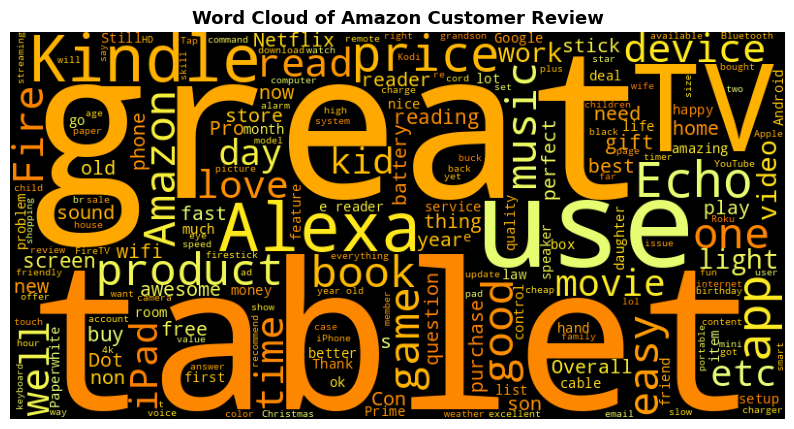

In [20]:
# Concatenate categories to a one string
CategoryText = ' '.join(Amazon_Dataset['Review_Text'].astype(str))
words = CategoryText.split()# Split the CategoryText into individual words
#converts the words list into a set, which automatically eliminates duplicate words, leaving only unique words. python Copy code # Create a new text with unique words unique_text = ' '.join(unique_words) unique_text is a single string containing all the unique words separated by spaces. ' '.join(unique_words) joins the unique words from the unique_words set back into a single string. python Copy code # Create a WordCloud object wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_text) wordcloud is a WordCloud object that will hold the generated word cloud visualization. WordCloud(width=800, height=400, background_color='white') creates a WordCloud object with specified width, height, and background color. The .generate(unique_text) method generates the word cloud from the unique_text string. python Copy code # Plot the WordCloud plt.figure(figsize=(10, 6)) plt.imshow(wordcloud) plt.axis('off') plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) plt.show() This section plots and displays the generated word cloud. plt.figure(figsize=(10, 6)) creates a Matplotlib figure with a specified size. plt.imshow(wordcloud) displays the word cloud image on the figure. plt.axis('off') turns off the axis labels and ticks. plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) sets the title for the plot. plt.show() displays the plot. In summary, the code concatenates Amazon product categories into a single string, processes the string to extract unique words, generates a word cloud visualization from the unique words, and plots the word cloud using Matplotlib.
unique_words = set(words)
unique_text = ' '.join(unique_words)#unique words sepereated by spaces
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap='Wistia').generate(unique_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Amazon Customer Review', fontweight='bold',fontsize=13)
plt.show()

###Word Cloud of Review Title

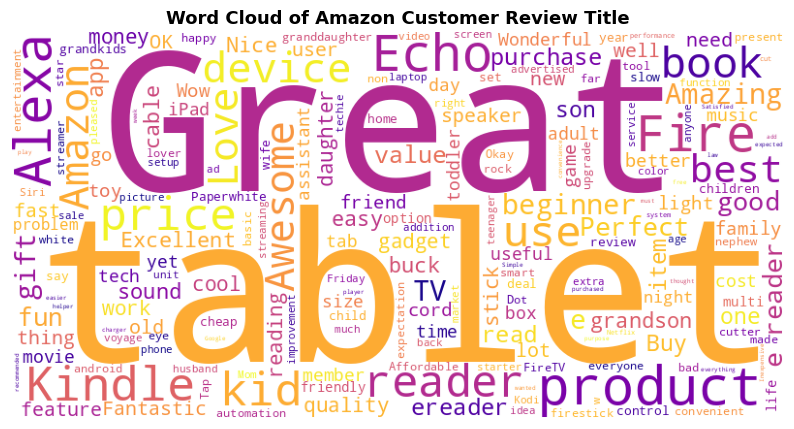

In [21]:
# Concatenate categories to a one string
CategoryText = ' '.join(Amazon_Dataset['Review_Title'].astype(str))
words = CategoryText.split()# Split the CategoryText into individual words
#converts the words list into a set, which automatically eliminates duplicate words, leaving only unique words. python Copy code # Create a new text with unique words unique_text = ' '.join(unique_words) unique_text is a single string containing all the unique words separated by spaces. ' '.join(unique_words) joins the unique words from the unique_words set back into a single string. python Copy code # Create a WordCloud object wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_text) wordcloud is a WordCloud object that will hold the generated word cloud visualization. WordCloud(width=800, height=400, background_color='white') creates a WordCloud object with specified width, height, and background color. The .generate(unique_text) method generates the word cloud from the unique_text string. python Copy code # Plot the WordCloud plt.figure(figsize=(10, 6)) plt.imshow(wordcloud) plt.axis('off') plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) plt.show() This section plots and displays the generated word cloud. plt.figure(figsize=(10, 6)) creates a Matplotlib figure with a specified size. plt.imshow(wordcloud) displays the word cloud image on the figure. plt.axis('off') turns off the axis labels and ticks. plt.title('Word Cloud of Amazon Product Categories', fontweight='bold', fontsize=13) sets the title for the plot. plt.show() displays the plot. In summary, the code concatenates Amazon product categories into a single string, processes the string to extract unique words, generates a word cloud visualization from the unique words, and plots the word cloud using Matplotlib.
unique_words = set(words)
unique_text = ' '.join(unique_words)#unique words sepereated by spaces
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='plasma').generate(unique_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Amazon Customer Review Title', fontweight='bold',fontsize=13)
plt.show()



---



# **Performing Sentiment Analysis and Visualizations on Amazon Customer Reviews**

### **VADER MODEL(Valence Aware Dictionary for Sentiment Reasoning)**
The VADER Model is a lexicon and rule-based tool, which uses a pre-defined list of words that are pre-scored. The sentiment of a text in VADER model is determined by aggregating the scores of individual words.

In [14]:
!pip install vaderSentiment #installing required library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Importing the Vader Sentiment library

In [15]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Importing the Vader Sentiment library

df = Amazon_Dataset.copy() #making a copy of the Amazon Dataset to apply it to the vader model

analyser = SentimentIntensityAnalyzer() # Creating an instance of SentimentIntensityAnalyzer
#The SentimentIntensityAnalyzer is a pre-trained model that can analyse the sentiment of a given text sample.
#The overall sentiment score for the input text is determined by combining a lexicon of words that have already been pre-scored for their sentiment.

def sentiment_analyzer_scores(sentence): #Performing sentiment analysis on customer reviews
    score = analyser.polarity_scores(sentence) #Four sentiment scores—compound, pos, neu, and neg—are returned by the function polarity_scores(), which takes a sentence as input.
    compound_score = score['compound'] #Compound score represents the overall sentiment of a given text
    if compound_score > 0:
        sentiment = 'Positive'
    elif compound_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return compound_score, score['pos'], score['neg'], score['neu'], sentiment
#The positive score represents the amount of positive words in text
#The negative score represents the amount of negative words in text
#The neutral score represents the amount of neutral words in text

df[['sentiment_score', 'positive_score', 'negative_score', 'neutral_score', 'sentiment']] = df['Review_Text'].apply(sentiment_analyzer_scores).apply(pd.Series)


#This line applies the sentiment_analyzer_scores function to each row of the 'Review_Text' column in the DataFrame df.
#The apply function applies the sentiment_analyzer_scores function to each row, and the results are returned as a Series.
#The pd.Series converts the Series of results into individual columns: 'sentiment_score', 'positive_score', 'negative_score', 'neutral_score', and 'sentiment'.
#These columns are added to the DataFrame df, containing the sentiment scores and sentiment labels for each review text.

In [16]:
display('VADER model results:',df[['Review_Text','positive_score','negative_score','neutral_score','sentiment_score','sentiment']])

'VADER model results:'

Review_Text  positive_score  \
0      This product so far has not disappointed. My c...           0.390   
1      great for beginner or experienced person. Boug...           0.493   
2      Inexpensive tablet for him to use and learn on...           0.104   
3      I've had my Fire HD 8 two weeks now and I love...           0.271   
4      I bought this for my grand daughter when she c...           0.082   
...                                                  ...             ...   
34652  This is not appreciably faster than any other ...           0.101   
34653  Amazon should include this charger with the Ki...           0.104   
34654  Love my Kindle Fire but I am really disappoint...           0.104   
34655  I was surprised to find it did not come with a...           0.074   
34656  to spite the fact that i have nothing but good...           0.158   

       negative_score  neutral_score  sentiment_score sentiment  
0               0.000          0.610           0.9194  Positive  
1               0.000          0.507           0.8934  Positive  
2               0.000          0.896           0.4404  Positive  
3               0.035          0.695           0.9882  Positive  
4               0.000          0.918           0.7876  Positive  
...               ...            ...              ...       ...  
34652           0.066          0.833           0.8455  Positive  
34653           0.000          0.896           0.5994  Positive  
34654           0.092          0.804          -0.0360  Negative  
34655           0.048          0.879           0.0690  Positive  
34656           0.122          0.720           0.7235  Positive  

[34255 rows x 6 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.



Below I have shown two texts with the same meaning but with a difference in capital letters and punctuations. The purpose of this is to show that a difference in punctuation and capital letters changes the intensity of a sentiment. The results above show that due to the differences, the negativity intensity is also different.

In [25]:
analyser.polarity_scores("I HATE YOU!!!")

{'neg': 0.696, 'neu': 0.304, 'pos': 0.0, 'compound': -0.6784}

In [26]:
analyser.polarity_scores("I hate you")

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

###Word Clouds for Positive, Neutral and Negative sentiments to inspect the most common words for each Sentiment

###Word Clouds

###Word Cloud for Negative Sentiment

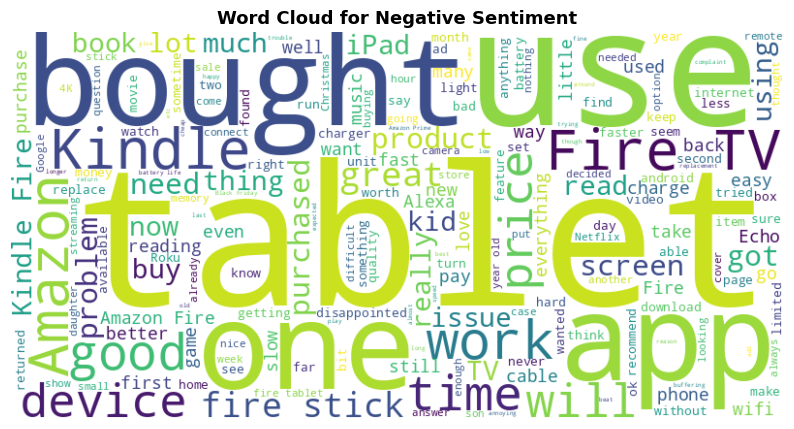

In [27]:
NegativeSentiment = df[df['sentiment'] == 'Negative'] #selecting Negative sentiment only
NegativeText = ' '.join(NegativeSentiment['Review_Text']) #Combining the negative sentiment text into a single string

wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='viridis').generate(NegativeText)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment',fontweight='bold',fontsize=13)
plt.show()

###Word Cloud for Positive Sentiment

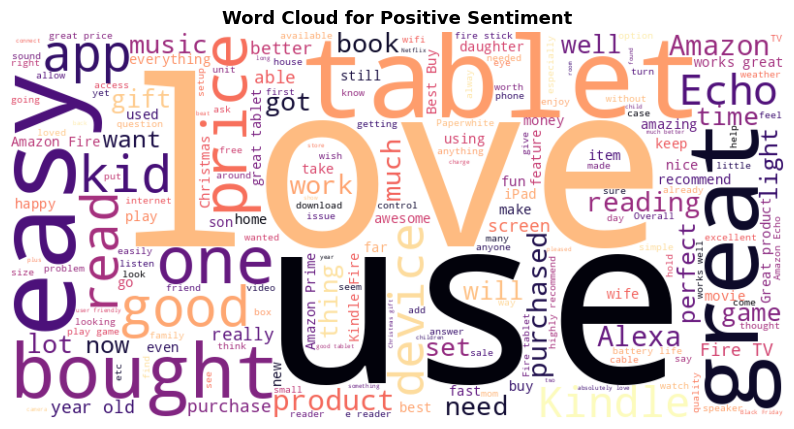

In [28]:
PositiveSentiment = df[df['sentiment'] == 'Positive'] #slecting Positive sentiment only
PositiveText = ' '.join(PositiveSentiment['Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='magma').generate(PositiveText)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment',fontweight='bold',fontsize=13)
plt.show()

###Word Cloud for Neutral Sentiment

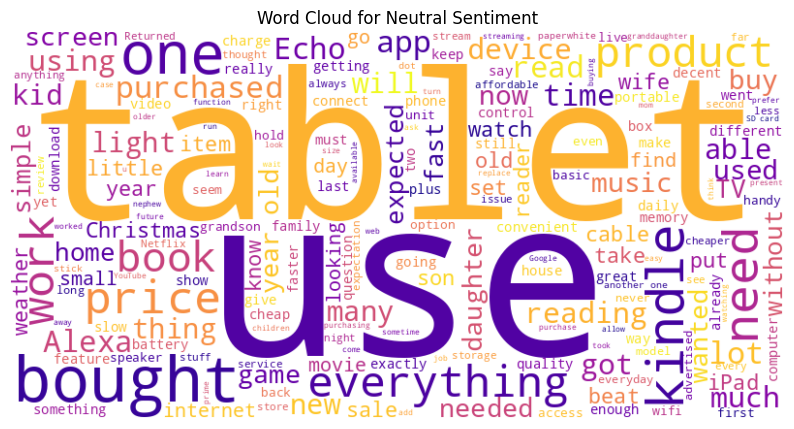

In [29]:
NeutralSentiment = df[df['sentiment'] == 'Neutral'] #Selecting Neutral sentiment only
NeutralText = ' '.join(NeutralSentiment['Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='plasma').generate(NeutralText)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

###Downloading the Updated Dataset with the VADER model Sentiment Labels.

In [30]:
# Saving the new DataFrame as a CSV file and downloading it to the computer
df.to_csv('df.csv', index=False)#index=False, to avoid saving index as an additional column to save space.
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



###**Queries with VADER Model results**
For the queries I am using SQLite, which is library that implements a self-contained, zero-configuration, and serverless database engine.

In [17]:
#Uploading the new Dataset with the Vader Model results.
uploaded = files.upload()
data = pd.read_csv('df.csv')

Saving df.csv to df.csv


<ipython-input-17-fdf08e7d417a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df.csv')


In [18]:
#creates a connection to a SQLite database named "datacamp_python.db" using the connect() method from the sqlite3 module.
#This connection object is used to execute SQL queries and interact with the database.
conn= sqlite3.connect("datacamp_python.db")#using an existing SQLite database

In [19]:
data.to_sql(
            'df', # Name of the table
            conn, # connection to the database
            if_exists='replace'
           )

34255

In [20]:
cursor = conn.cursor()#this allows you to execute SQL commands and interact with the database.
cursor.fetchone()#used to retrieve the next observation from the result.

###The count of Positive, Neutral and Negative Sentiment.

In [21]:
# Count positive, neutral and negative sentiments
query = "SELECT sentiment, COUNT(*) FROM df GROUP BY sentiment"
cursor.execute(query)#executes the SQL query
sentiment_counts = cursor.fetchall()#retrieves all the results
for sentiment, count in sentiment_counts:
    print(sentiment, "Sentiment:", count)

Negative Sentiment: 1972
Neutral Sentiment: 1172
Positive Sentiment: 31111


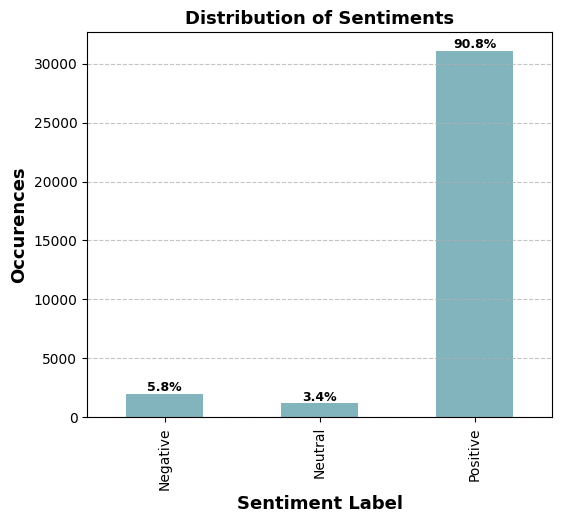

In [22]:
Sentiment = data['sentiment'].value_counts().sort_index() #selecting the variable sentiment

# Calculating the sum of sentiments
total_occurrences = Sentiment.sum()

# Calculating the % for each sentiments
SentimentPercentage = Sentiment / total_occurrences * 100

Ratingocc = Sentiment.plot(kind='bar', figsize=(6, 5), color='#82b4bd') #plotting the bar chart
Ratingocc.set_title('Distribution of Sentiments', fontweight='bold', fontsize=13)
Ratingocc.set_xlabel('Sentiment Label', fontweight='bold', fontsize=13)
Ratingocc.set_ylabel('Occurences', fontweight='bold', fontsize=13)

# Display %
for i, (sentiment, count) in enumerate(Sentiment.items()):
    rating_occ_percentage = SentimentPercentage[sentiment]
    Ratingocc.text(i, count, f'{rating_occ_percentage:.1f}%', ha='center', va='bottom', fontsize=9,fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.show()


###Count of Sentiments for each Rating

In [23]:
query = "SELECT Rating, sentiment, COUNT(*) FROM df WHERE Rating IS NOT NULL GROUP BY Rating, sentiment"
cursor.execute(query)
SentimentCount = cursor.fetchall()
for rating, sentiment, count in SentimentCount:
    print("\nRating:", rating, "   AND  ", sentiment, "Sentiment:", count)


Rating: 1.0    AND   Negative Sentiment: 168

Rating: 1.0    AND   Neutral Sentiment: 31

Rating: 1.0    AND   Positive Sentiment: 184

Rating: 2.0    AND   Negative Sentiment: 172

Rating: 2.0    AND   Neutral Sentiment: 27

Rating: 2.0    AND   Positive Sentiment: 193

Rating: 3.0    AND   Negative Sentiment: 313

Rating: 3.0    AND   Neutral Sentiment: 102

Rating: 3.0    AND   Positive Sentiment: 1064

Rating: 4.0    AND   Negative Sentiment: 543

Rating: 4.0    AND   Neutral Sentiment: 279

Rating: 4.0    AND   Positive Sentiment: 7672

Rating: 5.0    AND   Negative Sentiment: 772

Rating: 5.0    AND   Neutral Sentiment: 733

Rating: 5.0    AND   Positive Sentiment: 21969


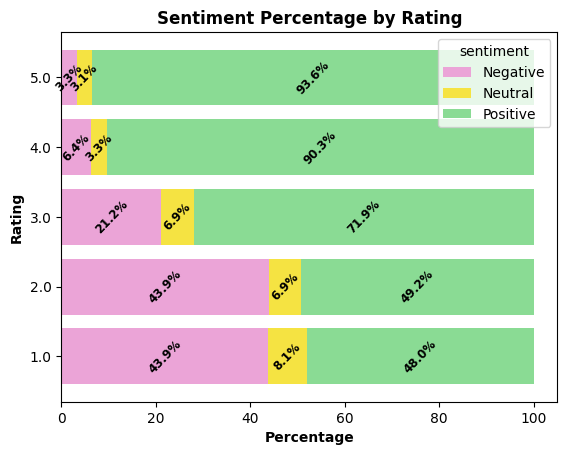

In [24]:
import matplotlib.pyplot as plt

# Grouping by Rating and sentiment to count the occurrences of each sentiment by Rating
SentimentByRating = data.groupby(['Rating', 'sentiment']).size().unstack(fill_value=0)
colors = ['#eba4d7', '#f5e342', '#8adb94']
# Calculate the total occurrences for each Rating
total_occurrences = SentimentByRating.sum(axis=1)

# Calculate the percentage of each sentiment label for each Rating
SentimentByRatingPercentage = SentimentByRating.div(total_occurrences, axis=0) * 100 #divices each observation and then multiplies to get %

# Create a horizontal stacked bar chart
ax = SentimentByRatingPercentage.plot(kind='barh', stacked=True, width=.8, color=colors)

# Set y-axis and x-axis labels
plt.ylabel('Rating', fontweight='bold')
plt.xlabel('Percentage', fontweight='bold')

# Set the title of the plot
plt.title('Sentiment Percentage by Rating', fontweight='bold')

# Show the percentages of sentiment labels inside the bars
for i, (colname, series) in enumerate(SentimentByRatingPercentage.iterrows()):
    starting = 0 #to keep track of the horizontal position where the text labels will be placed within the bars.

    for col in series.index:#iterates through the sentiment labels
        ax.text(starting + series[col] / 2, i, f'{series[col]:.1f}%', ha='center', va='center', fontweight='bold', rotation=46,fontsize=8.5,color='black')
        starting += series[col]#After placing the text label within the current bar, starting position is incremented

# Show the plot
plt.show()


###The Average Rating.

In [39]:
query = "SELECT AVG(Rating) FROM df"
cursor.execute(query)
average_rating = cursor.fetchone()[0]#retrieves the first observation
print("The Average Rating out of 5:", average_rating)

The Average Rating out of 5: 4.586231079422594


###The Maximum, Average and Minimum Sentiment Score

In [40]:
query = "SELECT AVG(sentiment_score), MAX(sentiment_score), MIN(sentiment_score) FROM df"
cursor.execute(query)
result = cursor.fetchone()
print("The Average Sentiment Score:", result[0])
print("The Maximum Sentiment Score:", result[1])
print("The Minimum Sentiment Score:", result[2])

The Average Sentiment Score: 0.6393237220843727
The Maximum Sentiment Score: 0.9998
The Minimum Sentiment Score: -0.9665


###Product and Brand name with Maximum Sentiment Score

In [41]:
# Query to find the product names and brand names with the maximum sentiment score excluding NULL values
query_max = "SELECT Product_Name, Brand FROM df WHERE sentiment_score = (SELECT MAX(sentiment_score) FROM df WHERE sentiment_score IS NOT NULL)"
cursor.execute(query_max)
max_results = cursor.fetchall()#contains a list of tuples, where each tuple represents a row

# Extracting product names and brand names from the results
product_names_max = [row[0] for row in max_results]
brand_names_max = [row[1] for row in max_results]

# Printing the product names and brand names with the maximum sentiment score
print("Product names with the Maximum Sentiment Score:", product_names_max)
print("Brand names with the Maximum Sentiment Score:", brand_names_max)

Product names with the Maximum Sentiment Score: ['Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black']
Brand names with the Maximum Sentiment Score: ['Amazon']


###Product and Brand name with Minimum Sentiment Score

In [42]:
# Query to find the product names and brand names with the minimum sentiment score (excluding None values)
query_min = "SELECT Product_Name, Brand FROM df WHERE sentiment_score = (SELECT MIN(sentiment_score) FROM df WHERE sentiment_score IS NOT NULL AND Product_Name IS NOT NULL) AND Product_Name IS NOT NULL"
cursor.execute(query_min)
min_results = cursor.fetchall()#contains a list of tuples, where each tuple represents a row

# Extracting product names and brand names from the results
product_names_min = [row[0] for row in min_results]
brand_names_min = [row[1] for row in min_results]

# Printing the product names and brand names with the minimum sentiment score
print("Product names with the Minimum Sentiment Score:", product_names_min)
print("Brand names with the Minimum Sentiment Score:", brand_names_min)


Product names with the Minimum Sentiment Score: ['Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,']
Brand names with the Minimum Sentiment Score: ['Amazon']


###Top 3 products with the highest sentiment scores.

In [43]:
# Query review text and product_name with the highest sentiment scores
query = "SELECT Review_Text,Brand, Product_Name, sentiment_score FROM df WHERE Product_Name IS NOT NULL ORDER BY sentiment_score DESC LIMIT 3"
cursor.execute(query)
highest_score_reviews = cursor.fetchall()

# Print the results
for review_text, brand,product_name, rating in highest_score_reviews:
    print("\nProduct Name:\n", product_name)
    print("Brand:\n", brand)
    print("Review:\n", review_text)
    print("Sentiment Score:\n", rating)



Product Name:
 Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black
Brand:
 Amazon
Review:
 This is a review of the Kindle Paperwhite launched July 2015. Essentially. the same as the previous Kindle Paperwhite but with a fantastic upgraded (300 dpi) screen, more memory and storage it's a terrific reading device. This review aims to describe both this product, and compare it with the other Kindle devices available to help you choose the best one for you.Before I start, Ive noticed several complains about Kindle not supporting the ePub format used by Canadian public libraries. Dont be put off, theres a solution in the Frequently Asked Questions section below.This review is broken up into sections so you can skip the less interesting bits. If youre in a hurry Ive included a summary at the start, and a Frequently Asked Questions section at the end.Summary - What can you do with it-----------------------------------------* Read a book. It can store 1,000s of books - take an

# Top 3 products with the lowest sentiment scores

In [44]:
# Query review text and product_name with the highest sentiment scores
query = "SELECT Review_Text,Brand, Product_Name, sentiment_score FROM df WHERE Product_Name IS NOT NULL ORDER BY sentiment_score ASC LIMIT 3"
cursor.execute(query)
highest_score_reviews = cursor.fetchall()

# Print the results
for review_text, brand,product_name, rating in highest_score_reviews:
    print("\nProduct Name:\n", product_name)
    print("Brand:\n", brand)
    print("Review:\n", review_text)
    print("Sentiment Score:\n", rating)



Product Name:
 Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,
Brand:
 Amazon
Review:
 I wouldn't buy again, had trouble w/shutting off all the time, we would have it reset back to the factory reset status and it would lock up and freeze, actually replaced with second thinking that was just a bad one however sad to report same problems. Not a favorite purchase.
Sentiment Score:
 -0.9229

Product Name:
 Amazon Fire Tv,,,
Amazon Fire Tv,,,
Brand:
 Amazon
Review:
 Bestbuy came through before the holiday better than Amazon--item available, arrived within 2 days, competitively priced. Great service there. My problem is with disappointing performance by Echo. Siri wins over Alexa. Issues encountered:1) a skill will be installed, but Alexa will tell me first, I need to install the skill and second, that the skill is already installed. User is stuck in a do-loop with no response.2) access to quick 1-sentence read from Wikipedia is appreciated, but if you ask 'tell me

###The Average Sentiment Score of each Brand

In [45]:
query = "SELECT Brand, AVG(sentiment_score) as Average_Sentiment FROM df GROUP BY Brand"
cursor.execute(query)
Avg_Sentiment_Score = cursor.fetchall()

for row in Avg_Sentiment_Score:
    brand = row[0]
    avg_sentiment = row[1]
    print("Brand Name:", brand)
    print("Average Sentiment Score:", avg_sentiment)
    print()


Brand Name: Amazon
Average Sentiment Score: 0.6505381674264169

Brand Name: Amazon Coco T
Average Sentiment Score: 0.6249

Brand Name: Amazon Digital Services Inc.
Average Sentiment Score: 0.40766

Brand Name: Amazon Echo
Average Sentiment Score: 0.6892836477987428

Brand Name: Amazon Fire
Average Sentiment Score: 0.6105703125000003

Brand Name: Amazon Fire Tv
Average Sentiment Score: 0.5721477538096155



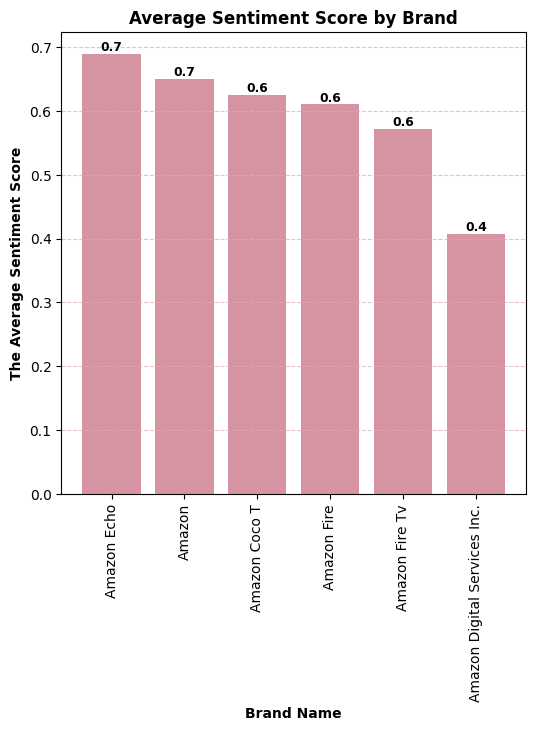

In [25]:
SentimentScoreByBrand = data.groupby('Brand')['sentiment_score'].mean()
SentimentByBrand = SentimentScoreByBrand.sort_values(ascending=False)
plt.figure(figsize=(6, 6))

plt.bar(SentimentByBrand.index, SentimentByBrand.values, color='#d694a3')
plt.xlabel('Brand Name', fontweight='bold')
plt.ylabel('The Average Sentiment Score', fontweight='bold')
plt.title('Average Sentiment Score by Brand', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7,color='#e3a8b5')
plt.xticks(rotation=90)

# Annotate each bar with its corresponding sentiment score value
for index, value in enumerate(SentimentByBrand.values):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=8.9, fontweight='bold')

plt.show()


###The Average Sentiment Score by Rating

In [47]:
query = "SELECT Rating, AVG(sentiment_score) AS Average_Sentiment FROM df GROUP BY Rating"
cursor.execute(query)
SentimentRating = cursor.fetchall()

for row in SentimentRating:
    rating = row[0]
    average_sentiment = row[1]
    print("Rating:", rating)
    print("Average Sentiment Score:", average_sentiment)
    print()


Rating: None
Average Sentiment Score: 0.6989000000000001

Rating: 1.0
Average Sentiment Score: 0.03778276762402091

Rating: 2.0
Average Sentiment Score: 0.06737806122448975

Rating: 3.0
Average Sentiment Score: 0.34776247464503063

Rating: 4.0
Average Sentiment Score: 0.6095850011773001

Rating: 5.0
Average Sentiment Score: 0.6877367172190493



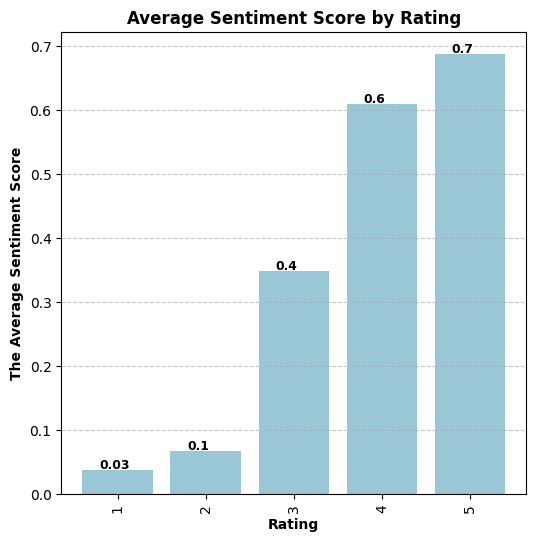

In [26]:
SentimentScoreByRating = data.groupby('Rating')['sentiment_score'].mean()
SentimentByRating = SentimentScoreByRating.sort_values(ascending=False)
plt.figure(figsize=(6, 6))

bars = plt.bar(SentimentByRating.index, SentimentByRating.values, color='#9ac7d6')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('The Average Sentiment Score', fontweight='bold')
plt.title('Average Sentiment Score by Rating', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.text(4.79, 0.69, s='0.7', color='black', fontsize=8.9, fontweight='bold')
plt.text(3.79, 0.612, s='0.6', color='black', fontsize=8.9, fontweight='bold')
plt.text(2.79, 0.351, s='0.4', color='black', fontsize=8.9, fontweight='bold')
plt.text(1.79, 0.0689, s='0.1', color='black', fontsize=8.9, fontweight='bold')
plt.text(0.79, 0.039, s='0.03', color='black', fontsize=8.9, fontweight='bold')


plt.show()


###Average Sentiment Score each Month

In [49]:
query = "SELECT strftime('%Y-%m', DateOfReview) AS month, AVG(sentiment_score) AS average_sentiment_score FROM df GROUP BY month"
#calculates the average sentiment score for each month by formatting the 'DateOfReview' column to 'YYYY-MM' format USING strftime function
cursor.execute(query)
AvgScoreMonth = cursor.fetchall()
for month, average_sentiment_score in AvgScoreMonth:
    print("\nMonth:", month, "Average Sentiment Score:", average_sentiment_score)



Month: None Average Sentiment Score: 0.7253282051282052

Month: 2010-07 Average Sentiment Score: 0.8168200000000001

Month: 2010-09 Average Sentiment Score: 0.1644

Month: 2010-10 Average Sentiment Score: 0.8984

Month: 2011-11 Average Sentiment Score: 0.53475

Month: 2012-02 Average Sentiment Score: 0.9914

Month: 2012-05 Average Sentiment Score: 0.9724

Month: 2012-09 Average Sentiment Score: 0.8681800000000001

Month: 2012-10 Average Sentiment Score: 0.116775

Month: 2012-11 Average Sentiment Score: -0.15538000000000002

Month: 2012-12 Average Sentiment Score: 0.75705

Month: 2013-01 Average Sentiment Score: 0.9299

Month: 2013-02 Average Sentiment Score: 0.4637

Month: 2014-04 Average Sentiment Score: 0.970325

Month: 2014-05 Average Sentiment Score: 0.44772

Month: 2014-10 Average Sentiment Score: 0.8187857142857142

Month: 2014-11 Average Sentiment Score: 0.8242194444444441

Month: 2014-12 Average Sentiment Score: 0.5372894736842104

Month: 2015-01 Average Sentiment Score: 0.712

In [50]:
query = "SELECT strftime('%Y-%m-%d', DateOfReview) AS date, AVG(sentiment_score) AS average_sentiment_score FROM df WHERE DateOfReview IS NOT NULL AND sentiment_score IS NOT NULL GROUP BY date"
cursor.execute(query)
results = cursor.fetchall()

# Extracting the dates of review and the average sentiment scores
dates = []
average_scores = []
for date, avg_score in results:
    if date is not None and avg_score is not None: #not selecting the null values
        dates.append(date)
        average_scores.append(avg_score)
data = pd.DataFrame({'Date': dates, 'Average Sentiment Score': average_scores})

fig = px.line(data, x='Date', y='Average Sentiment Score', title='The Average Sentiment Score Over Time')#creates a line plot using Plotly which is used to create interactive line plot
fig.update_xaxes(tickangle=45)
fig.update_layout(plot_bgcolor='#e1eef2')
fig.update_traces(line_color='#0f4d4d')
fig.show()

###Sentiment Distribution by Brand

In [51]:
query = "SELECT Brand, COUNT(CASE WHEN sentiment_score > 0 THEN 1 END) AS positive_Count, " \
        "COUNT(CASE WHEN sentiment_score < 0 THEN 1 END) AS negative_Count, " \
        "COUNT(CASE WHEN sentiment_score = 0 THEN 1 END) AS neutral_Count " \
        "FROM df GROUP BY Brand"
cursor.execute(query)
SentimentScore = cursor.fetchall()

for row in SentimentScore:
    brand = row[0]
    positive_count = row[1]
    negative_count = row[2]
    neutral_count = row[3]
    print("Brand Name:", brand)
    print("Number of Positive Sentiments:", positive_count)
    print("Number of Negative Sentiment:", negative_count)
    print("Number of Neutral Sentiment:", neutral_count)
    print()

Brand Name: Amazon
Number of Positive Sentiments: 25836
Number of Negative Sentiment: 1481
Number of Neutral Sentiment: 982

Brand Name: Amazon Coco T
Number of Positive Sentiments: 1
Number of Negative Sentiment: 0
Number of Neutral Sentiment: 0

Brand Name: Amazon Digital Services Inc.
Number of Positive Sentiments: 7
Number of Negative Sentiment: 3
Number of Neutral Sentiment: 0

Brand Name: Amazon Echo
Number of Positive Sentiments: 592
Number of Negative Sentiment: 24
Number of Neutral Sentiment: 20

Brand Name: Amazon Fire
Number of Positive Sentiments: 229
Number of Negative Sentiment: 20
Number of Neutral Sentiment: 7

Brand Name: Amazon Fire Tv
Number of Positive Sentiments: 4446
Number of Negative Sentiment: 444
Number of Neutral Sentiment: 163



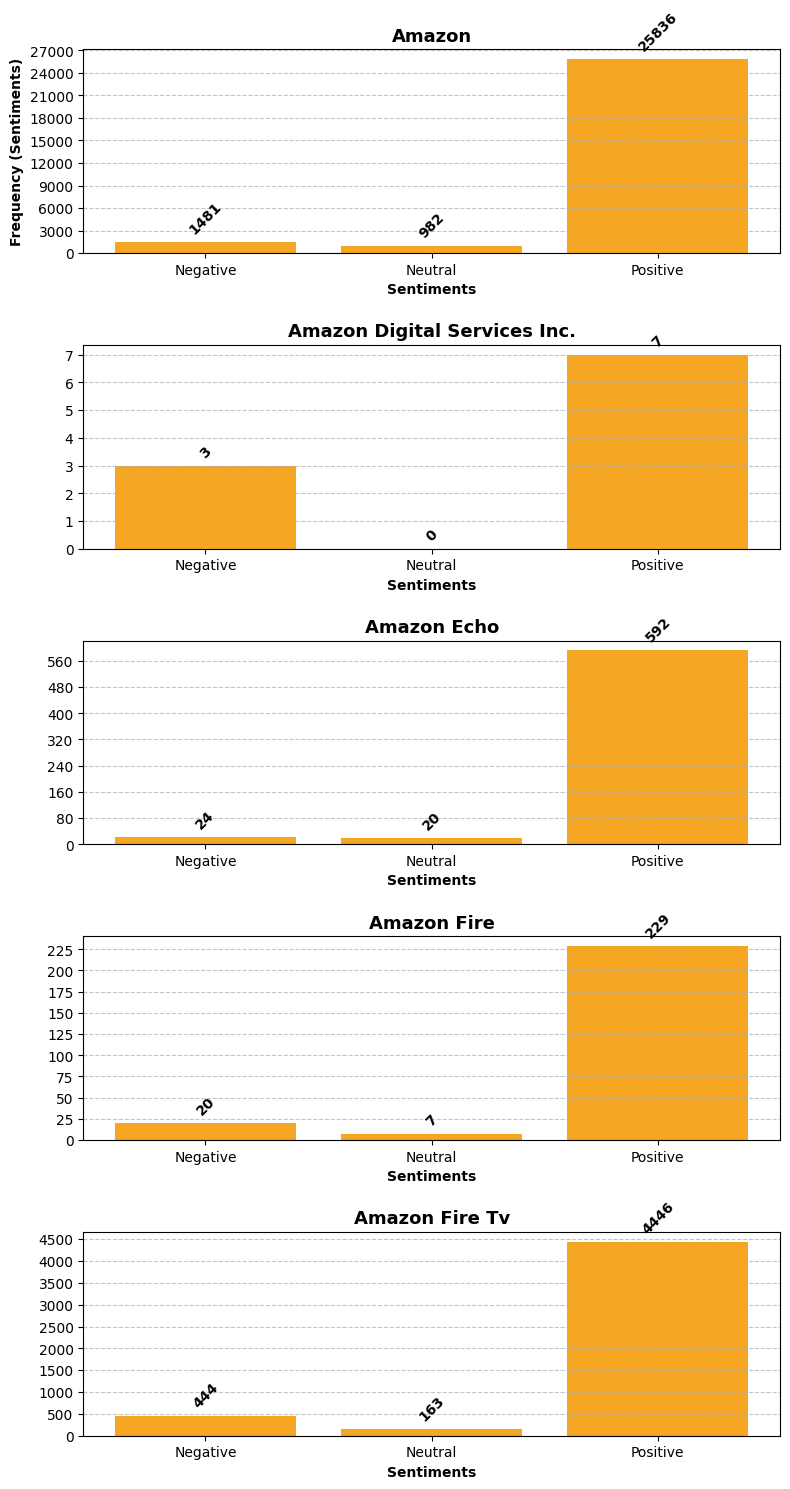

In [52]:
sentiment_distribution = df.groupby(['Brand', 'sentiment']).size().unstack(fill_value=0)#Grouping by Brand and Sentiment
selective_brands = ['Amazon', 'Amazon Digital Services Inc.', 'Amazon Echo', 'Amazon Fire', 'Amazon Fire Tv']#Brands
sentiment_distribution = sentiment_distribution.loc[selective_brands]#Selecting only the mentioned brands, using loc, method which is used to filter.
sentiment_distribution = sentiment_distribution.sort_index()#sorting
#Converting to list
brands = sentiment_distribution.index.tolist()
sentiments = sentiment_distribution.columns.tolist()
fig, axes = plt.subplots(len(selective_brands), 1, figsize=(8, 15))#Subplots

for i, (brand, data) in enumerate(sentiment_distribution.iterrows()):
    bars = axes[i].bar(sentiments, data, color='#f5a623')
    axes[i].set_title(brand, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Sentiments', fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.75)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    for bar in bars:
        height = bar.get_height()#gets the height
        axes[i].annotate('{}'.format(height), #display annotations at the height of the bar
                         xy=(bar.get_x() + bar.get_width() / 2, height),#annotates at the center of the bar's x-coordinate and  height of the bar.
                         xytext=(0, 4),  # starting point
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
axes[0].set_ylabel('Frequency (Sentiments)', fontweight='bold')
plt.tight_layout()#spacing
plt.show()

###Extracting Negative words

In [27]:
import nltk
nltk.download('punkt') #installing required library
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
#Negative word list
negative_word_list = ['bad', 'poor', 'terrible', 'disappointing', 'awful', 'horrible', 'inconvenient','negative', 'unpleasant', 'inferior','defective','faulty','overpriced','flawed','problematic','unsatisfactory','unreliable','misleading','low-quality','inconvenient','inefficient']
negative_df = df[df['sentiment'] == 'Negative']#Selecting negative sentiment labels only
data = []#empty list to store data

for index, row in negative_df.iterrows():#Iterate over the negative reviews
    product_name = row['Product_Name']
    brand = row['Brand']
    category = row['Categories']
    review_text = row['Review_Text']
    words = word_tokenize(review_text.lower()) #Tokenize the review text into words

    negative_words = [word for word in words if word in negative_word_list]
    data.extend([(product_name, brand, category, review_text, word) for word in negative_words])

results_df = pd.DataFrame(data, columns=['Product Name', 'Brand', 'Category', 'Review_Text', 'Negative Word'])

In [29]:
display(results_df)

Product Name           Brand  \
0    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
1    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
3    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
4    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
..                                                 ...             ...   
167                                                NaN  Amazon Fire Tv   
168                                                NaN  Amazon Fire Tv   
169                                                NaN  Amazon Fire Tv   
170                                                NaN  Amazon Fire Tv   
171                                                NaN  Amazon Fire Tv   

                                              Category  \
0    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
..                                                 ...   
167  Back To College,College Electronics,College Tv...   
168  Back To College,College Electronics,College Tv...   
169  Back To College,College Electronics,College Tv...   
170  Back To College,College Electronics,College Tv...   
171  Back To College,College Electronics,College Tv...   

                                           Review_Text Negative Word  
0    Though I have got it for cheap price during bl...           bad  
1    This is a good product for video, surfing and ...   problematic  
2    This is a good product for video, surfing and ...  inconvenient  
3    This is not a bad product. Amazon offers great...           bad  
4    I have always gone to buy a kindle because I l...    unreliable  
..                                                 ...           ...  
167  This device has been designed taking into acco...           bad  
168  This device has been designed taking into acco...      horrible  
169  Is a god but i have to pay 100 dollar a year i...           bad  
170  Pros:- Amazon Prime works on it.- You can stil...           bad  
171  You can go cheap and get the fire stick, but f...           bad  

[172 rows x 5 columns]



---



### **nlptown/bert-base-multilingual-uncased-sentiment model**
This model is a pre-trained model available on the open-source hugging face platform. The model is fine-tuned on product reviews using 150,000 English product reviews and has accuracy of above 65% for the language English. The model classifies sentiments as stars ranging from 1 to 5, where 5 represents most positive and 1 represents most negative. In this project, the labels “Very positive” and “Positive” has been combined as Positive, and “Very negative” and “negative” has been combined as Negative. In this model, when the text reviews are passed, the reviews are tokenized at first and is then fed to the pre-trained BERT model.

In [59]:
pip install transformers ##installing the required library for using the pre-trained model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.0 MB/s eta 0:00:00


In [60]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [61]:
pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 6.8 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline #importing the transformers pipeline
# Loading the Sentiment Analysis Transformers Pipeline bert-base-multilingual-uncased-sentiment which is a pretrained model.
nlp = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
Dataset = Amazon_Dataset.copy()  #Making a copy of the original Dataset

#Initializing lists to store the Sentiment Scores and Labels.
sentiment_labels = []
sentiment_scores = []

for index, row in Dataset.iterrows(): #Loop to iterate on each row to process every text review
    text = row['Review_Text']

    #This line divides the "text" into chunks with a maximum of 512 characters.Splitting the text into smaller portions enables to do sentiment analysis on longer tests, when the model have a maximum input length.
    #The pipeline analyzes the review text in chunks because some models have a maximum input length, and splitting the text allows us to perform sentiment analysis on longer reviews.
    text_chunks = [text[i:i + 512] for i in range(0, len(text), 512)]


    chunk_results = []#Initializing empty list to store text chunks sentiment analysis results
    for chunk in text_chunks:#Loop to iterate on text chunk starts here
        result = nlp(chunk)#Perform Sentiment Analysis on current text chunk
        chunk_results.extend(result)#Adding sentiment analysis Results of each text chunk

#Here, the sentiment label and score is extracted from the last sentiment analysis results. If there is results and not empty, then it will be extracted and added to Sentiment_Label and Sentiment_Score. Else, No.
#Purpose of this is to avoid errors, so that in case of empty results, it assigns a value None to avoid any errors. It makes sure that it always has a value, even if it is
#'label' and 'score' are pre-defined keys in transformers pipeline to extract label and score.
    sentiment_label = chunk_results[-1]['label'] if chunk_results else "N/A"
    sentiment_score = chunk_results[-1]['score'] if chunk_results else None

    sentiment_labels.append(sentiment_label)   # Add Sentiment Label to the list initialized earlier
    sentiment_scores.append(sentiment_score)   # Add Sentiment Score to the list initialized earlier

#Add new columns to the Dataset for the Sentiment Label and Score
Dataset['SentimentByBert'] = sentiment_labels
Dataset['SENTIMENT_SCORE'] = sentiment_scores

# Display the updated DataFrame
print(Dataset)


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


                         ID  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34652  AVpfiBlyLJeJML43-4Tp   
34653  AVpfiBlyLJeJML43-4Tp   
34654  AVpfiBlyLJeJML43-4Tp   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   

                                            Product_Name       asins   Brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34652                                                NaN  B006GWO5W

In [ ]:
Dataset['SentimentByBert'].replace({'5 stars': 'Positive', '4 stars': 'Positive', '3 stars': 'Neutral', '2 stars': 'Negative', '1 star': 'Negative'}, inplace=True) #replacing stars as labels

In [34]:
display(Dataset[['Review_Text','SentimentByBert','SENTIMENT_SCORE']])

Review_Text SentimentByBert  \
0      This product so far has not disappointed. My c...        Positive   
1      great for beginner or experienced person. Boug...        Positive   
2      Inexpensive tablet for him to use and learn on...        Positive   
3      I've had my Fire HD 8 two weeks now and I love...        Positive   
4      I bought this for my grand daughter when she c...        Positive   
...                                                  ...             ...   
34250  This is not appreciably faster than any other ...        Positive   
34251  Amazon should include this charger with the Ki...        Negative   
34252  Love my Kindle Fire but I am really disappoint...         Neutral   
34253  I was surprised to find it did not come with a...        Negative   
34254  to spite the fact that i have nothing but good...        Negative   

       SENTIMENT_SCORE  
0             0.496426  
1             0.562293  
2             0.649892  
3             0.700856  
4             0.557092  
...                ...  
34250         0.599318  
34251         0.663165  
34252         0.531306  
34253         0.637097  
34254         0.463816  

[34255 rows x 3 columns]

In [ ]:
from google.colab import files
Dataset.to_csv('Dataset.csv', index=False)
files.download('Dataset.csv')#downloading the dataset with the bert model results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:

#Uploading the new Dataset with the BERT model results.
uploaded = files.upload()
Dataset = pd.read_csv('Dataset.csv')

Saving Dataset.csv to Dataset.csv


<ipython-input-30-359f1b6a4a75>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset = pd.read_csv('Dataset.csv')


###Word Cloud for Positive and Negative Sentiments

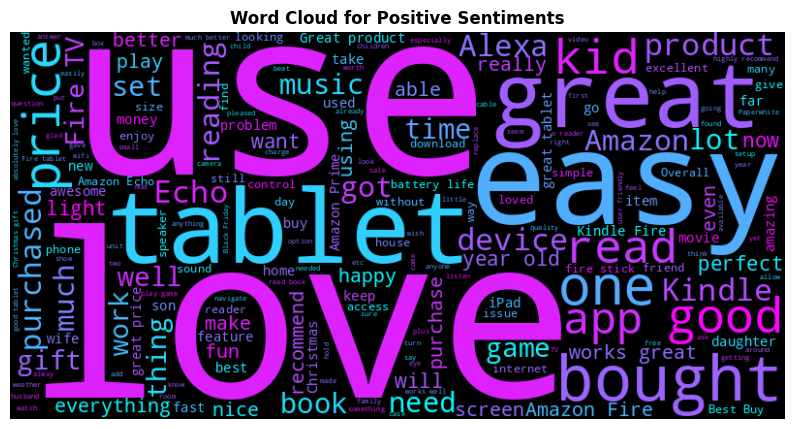

In [ ]:
positive_sentiments = Dataset[Dataset['SentimentByBert'].isin(['Positive'])]#selecting positive sentiment only

#Combining the text into a single string
positive_text = ' '.join(positive_sentiments['Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap="cool").generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments',fontweight='bold')
plt.show()

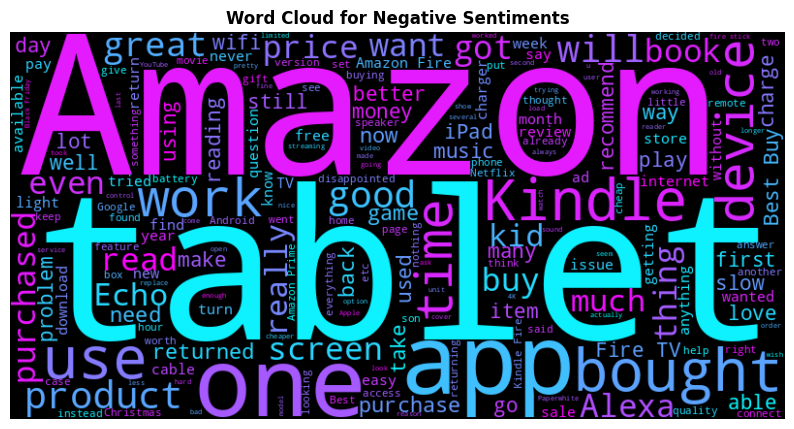

In [ ]:
negative_sentiments = Dataset[Dataset['SentimentByBert'].isin(['Negative'])]#selecting text with negative sentiment only

#Combining the text into a single string
negative_text = ' '.join(negative_sentiments['Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap="cool").generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments',fontweight='bold')
plt.show()

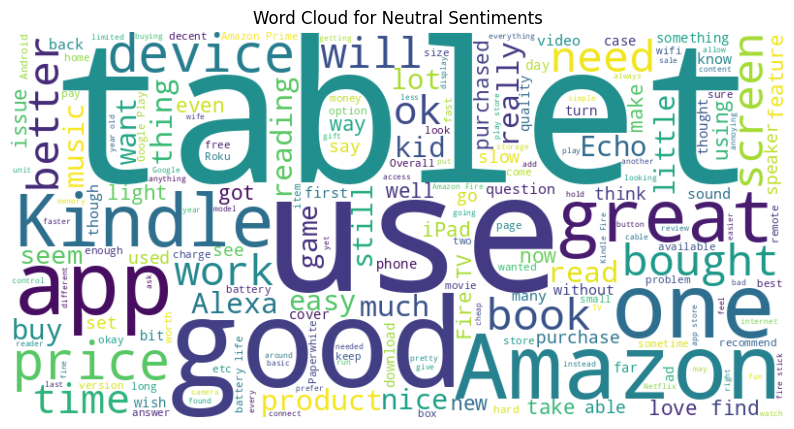

In [ ]:
neutral_sentiments = Dataset[Dataset['SentimentByBert'].isin(['Neutral'])]#selecting text with neutral sentiment only

#Combining the text into a single string
neutral_text = ' '.join(neutral_sentiments['Review_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Emotion Analysis

# Applying another Transformers Piepline for Emotion Analysis

###j-hartmann/emotion-english-distilroberta-base

In [ ]:
#Loading the pre-trained emotion analysis model and tokenizer from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
DatasetEmotion = Dataset.copy()  # Creating a copy of the Dataset

emotion_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)  # Defining the emotion analysis pipeline

Emotions = []  # Initializing an empty list to store emotions

for text in DatasetEmotion['Review_Text']:  # Iterate over each row
    # Truncate or split the text into smaller chunks
    text_chunks = [text[i:i + 512] for i in range(0, len(text), 512)]

    chunk_results = []  # Initialize an empty list to store results
    for textchunk in text_chunks:  # Iterate over each text chunk
        results = emotion_pipeline(textchunk)  # Apply emotion analysis
        chunk_results.extend(results)  # Add results to the chunk_results list
    emotion = chunk_results[-1]['label']  # Extract the last emotion label from the chunk_results list
    # Add the emotion to the list
    Emotions.append(emotion)

# Adding the predicted emotion results in the Dataset.
DatasetEmotion['Emotion'] = Emotions

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
display(DatasetEmotion)

ID  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34250  AVpfiBlyLJeJML43-4Tp   
34251  AVpfiBlyLJeJML43-4Tp   
34252  AVpfiBlyLJeJML43-4Tp   
34253  AVpfiBlyLJeJML43-4Tp   
34254  AVpfiBlyLJeJML43-4Tp   

                                            Product_Name       asins   Brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34250                                                NaN  B006GWO5WK  Amazon   
34251                                                NaN  B006GWO5WK  Amazon   
34252                                                NaN  B006GWO5WK  Amazon   
34253                                                NaN  B006GWO5WK  Amazon   
34254                                                NaN  B006GWO5WK  Amazon   

                                              Categories  \
0      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4      Electronics,iPad & Tablets,All Tablets,Fire Ta...   
...                                                  ...   
34250  Computers/Tablets & Networking,Tablet & eBook ...   
34251  Computers/Tablets & Networking,Tablet & eBook ...   
34252  Computers/Tablets & Networking,Tablet & eBook ...   
34253  Computers/Tablets & Networking,Tablet & eBook ...   
34254  Computers/Tablets & Networking,Tablet & eBook ...   

                                                    Keys  \
0      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
1      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
2      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
3      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
4      841667104676,amazon/53004484,amazon/b01ahb9cn2...   
...                                                  ...   
34250  newamazonkindlefirehd9wpowerfastadaptercharger...   
34251  newamazonkindlefirehd9wpowerfastadaptercharger...   
34252  newamazonkindlefirehd9wpowerfastadaptercharger...   
34253  newamazonkindlefirehd9wpowerfastadaptercharger...   
34254  newamazonkindlefirehd9wpowerfastadaptercharger...   

                       Manufacturer              DateOfReview  \
0                            Amazon  2017-01-13T00:00:00.000Z   
1                            Amazon  2017-01-13T00:00:00.000Z   
2                            Amazon  2017-01-13T00:00:00.000Z   
3                            Amazon  2017-01-13T00:00:00.000Z   
4                            Amazon  2017-01-12T00:00:00.000Z   
...                             ...                       ...   
34250  Amazon Digital Services, Inc      2012-09-18T00:00:00Z   
34251  Amazon Digital Services, Inc      2012-11-21T00:00:00Z   
34252  Amazon Digital Services, Inc      2012-10-19T00:00:00Z   
34253  Amazon Digital Services, Inc      2012-10-31T00:00:00Z   
34254  Amazon Digital Services, Inc      2012-12-23T00:00:00Z   

            ReviewAddedDate ReviewRecommended  No_Of_HelpfulReviews  Rating  \
0      2017-07-03T23:33:15Z              True                   0.0     5.0   
1      2017-07-03T23:33:15Z              True                   0.0     5.0   
2      2017-07-03T23:33:15Z              True                   0.0     5.0   
3      2017-07-03T23:33:15Z              True                   0.0     4.0   
4      2017-07-03T23:33:15Z              True                   0.0     5

In [35]:
DatasetEmotion[["Review_Text","Emotion","SentimentByBert"]]

Review_Text   Emotion  \
0      This product so far has not disappointed. My c...       joy   
1      great for beginner or experienced person. Boug...       joy   
2      Inexpensive tablet for him to use and learn on...       joy   
3      I've had my Fire HD 8 two weeks now and I love...  surprise   
4      I bought this for my grand daughter when she c...   neutral   
...                                                  ...       ...   
34250  This is not appreciably faster than any other ...   neutral   
34251  Amazon should include this charger with the Ki...   neutral   
34252  Love my Kindle Fire but I am really disappoint...   sadness   
34253  I was surprised to find it did not come with a...  surprise   
34254  to spite the fact that i have nothing but good...     anger   

      SentimentByBert  
0            Positive  
1            Positive  
2            Positive  
3            Positive  
4            Positive  
...               ...  
34250        Positive  
34251        Negative  
34252         Neutral  
34253        Negative  
34254        Negative  

[34255 rows x 3 columns]

In [ ]:
import pandas as pd
from google.colab import files

# Downloading the updated file emotion analysis results
DatasetEmotion.to_csv('DatasetEmotion.csv', index=False)
files.download('DatasetEmotion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
uploaded = files.upload()
#Uploading the updated dataset with emotion and sentiment analysis
DatasetEmotion = pd.read_csv('DatasetEmotion.csv')

Saving DatasetEmotion.csv to DatasetEmotion.csv


<ipython-input-32-4ca0ad2b5f63>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  DatasetEmotion = pd.read_csv('DatasetEmotion.csv')


### **Queries with bert-base-multilingual-uncased-sentiment model**

In [36]:
import sqlite3
import pandas as pd
conn= sqlite3.connect("datacamp_python.db")

In [37]:
DatasetEmotion.to_sql(
            'DatasetEmotion',       #table name
            conn,                   # connection to the database
            if_exists='replace'
           )

34255

In [38]:
cursor = conn.cursor()#this allows you to execute SQL commands and interact with the database.
cursor.fetchone()#used to retrieve the next observation from the result.

###Count of Positive, Negative and Neutral Sentiment.

In [ ]:
query = "SELECT SentimentByBert, COUNT(*) FROM DatasetEmotion GROUP BY SentimentByBert"
cursor.execute(query)
SentimentCount = cursor.fetchall()
for sentiment, count in SentimentCount:
    print(sentiment, "Sentiment Label Count:", count,"\n")

Negative Sentiment Label Count: 1545 

Neutral Sentiment Label Count: 2237 

Positive Sentiment Label Count: 30473 



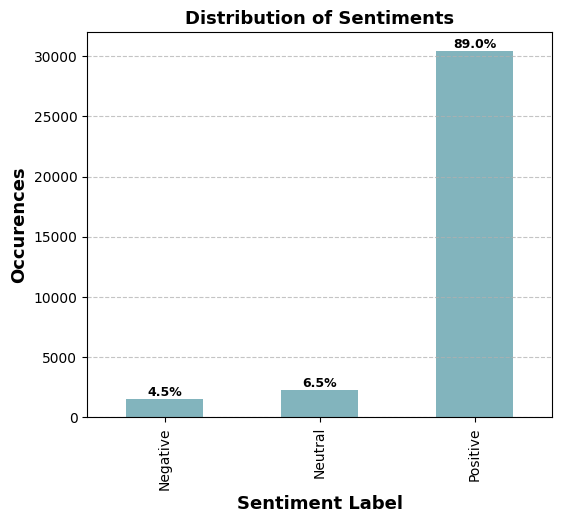

In [39]:
Sentiment = DatasetEmotion['SentimentByBert'].value_counts().sort_index() #selecting column sentiment

# Calculating the sum of sentiments
total_occurrences = Sentiment.sum()

# Calculating the % for each sentiments
SentimentPercentage = Sentiment / total_occurrences * 100

Ratingocc = Sentiment.plot(kind='bar', figsize=(6, 5), color='#82b4bd') #plotting the bar chart
Ratingocc.set_title('Distribution of Sentiments', fontweight='bold', fontsize=13)
Ratingocc.set_xlabel('Sentiment Label', fontweight='bold', fontsize=13)
Ratingocc.set_ylabel('Occurences', fontweight='bold', fontsize=13)

# Display %
for i, (sentiment, count) in enumerate(Sentiment.items()):
    rating_occ_percentage = SentimentPercentage[sentiment]
    Ratingocc.text(i, count, f'{rating_occ_percentage:.1f}%', ha='center', va='bottom', fontsize=9,fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.show()


###Count of Sentiment for each Rating

In [ ]:
query = "SELECT Rating, SentimentByBert, COUNT(*) FROM DatasetEmotion WHERE Rating IS NOT NULL GROUP BY Rating, SentimentByBert"
cursor.execute(query)
SentimentCount = cursor.fetchall()
for rating, sentiment, count in SentimentCount:
    print("Rating", rating, "   AND   ", sentiment, "Sentiment:", count,"\n")

Rating: None = Negative Sentiment: 7 

Rating: None = Neutral Sentiment: 8 

Rating: None = Positive Sentiment: 18 

Rating: 1.0 = Negative Sentiment: 322 

Rating: 1.0 = Neutral Sentiment: 27 

Rating: 1.0 = Positive Sentiment: 34 

Rating: 2.0 = Negative Sentiment: 251 

Rating: 2.0 = Neutral Sentiment: 94 

Rating: 2.0 = Positive Sentiment: 47 

Rating: 3.0 = Negative Sentiment: 299 

Rating: 3.0 = Neutral Sentiment: 614 

Rating: 3.0 = Positive Sentiment: 566 

Rating: 4.0 = Negative Sentiment: 285 

Rating: 4.0 = Neutral Sentiment: 946 

Rating: 4.0 = Positive Sentiment: 7263 

Rating: 5.0 = Negative Sentiment: 381 

Rating: 5.0 = Neutral Sentiment: 548 

Rating: 5.0 = Positive Sentiment: 22545 



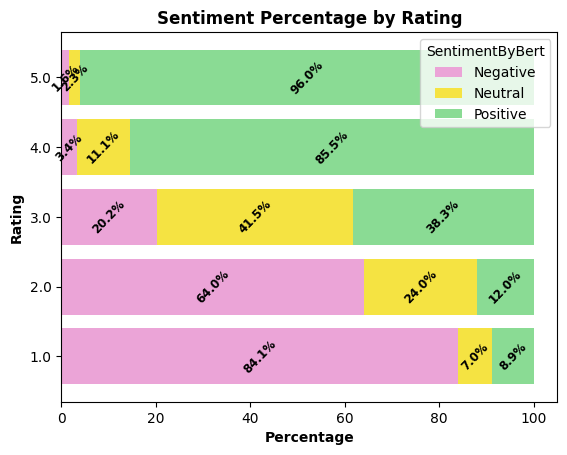

In [40]:
# Grouping by Rating and sentiment to count the occurrences of each sentiment by Rating
SentimentByRating = DatasetEmotion.groupby(['Rating', 'SentimentByBert']).size().unstack(fill_value=0)
colors = ['#eba4d7', '#f5e342', '#8adb94']
# Calculate the total occurrences for each Rating
total_occurrences = SentimentByRating.sum(axis=1)

# Calculate the percentage of each sentiment label for each Rating
SentimentByRatingPercentage = SentimentByRating.div(total_occurrences, axis=0) * 100

ax = SentimentByRatingPercentage.plot(kind='barh', stacked=True, width=.8, color=colors)#Horizontal stacked bar chart
plt.ylabel('Rating', fontweight='bold')
plt.xlabel('Percentage', fontweight='bold')
plt.title('Sentiment Percentage by Rating', fontweight='bold')

#Percentages
for i, (colname, series) in enumerate(SentimentByRatingPercentage.iterrows()):
    starting = 0
    for col in series.index:
        ax.text(starting + series[col] / 2, i, f'{series[col]:.1f}%', ha='center', va='center', fontweight='bold', rotation=46,fontsize=8.5,color='black')
        starting += series[col]
plt.show()

###Average Rating Monthly

In [67]:
query = "SELECT strftime('%Y-%m', DateOfReview) AS month, AVG(Rating) AS Avg_Rating FROM df GROUP BY month"
#calculates the average sentiment score for each month by formatting the 'DateOfReview' column to 'YYYY-MM' format USING strftime function
cursor.execute(query)
AvgScoreMonth = cursor.fetchall()
for month, Avg_Rating in AvgScoreMonth:
    print("\nMonth:", month, "Average Rating:", Avg_Rating)



Month: None Average Rating: 4.655172413793103

Month: 2010-07 Average Rating: 4.4

Month: 2010-09 Average Rating: 1.0

Month: 2010-10 Average Rating: 1.0

Month: 2011-11 Average Rating: 3.3333333333333335

Month: 2012-02 Average Rating: 5.0

Month: 2012-05 Average Rating: 5.0

Month: 2012-09 Average Rating: 4.0

Month: 2012-10 Average Rating: 1.0

Month: 2012-11 Average Rating: 1.8

Month: 2012-12 Average Rating: 3.0

Month: 2013-01 Average Rating: 5.0

Month: 2013-02 Average Rating: 5.0

Month: 2014-04 Average Rating: None

Month: 2014-05 Average Rating: None

Month: 2014-10 Average Rating: 4.857142857142857

Month: 2014-11 Average Rating: 4.666666666666667

Month: 2014-12 Average Rating: 4.578947368421052

Month: 2015-01 Average Rating: 4.583333333333333

Month: 2015-02 Average Rating: 4.818181818181818

Month: 2015-03 Average Rating: 4.533333333333333

Month: 2015-04 Average Rating: 4.705882352941177

Month: 2015-05 Average Rating: 4.647058823529412

Month: 2015-06 Average Rating: 

In [ ]:
import plotly.express as px
query = "SELECT strftime('%Y-%m', DateOfReview) AS month_year, AVG(Rating) AS average_rating FROM DatasetEmotion WHERE DateOfReview IS NOT NULL AND Rating IS NOT NULL GROUP BY month_year"
cursor.execute(query)
results = cursor.fetchall()

months_years = []
average_ratings = []
for month_year, avg_rating in results:
    if month_year is not None and avg_rating is not None:
        months_years.append(month_year)
        average_ratings.append(avg_rating)

data = pd.DataFrame({'Month_Year': months_years, 'Average Rating': average_ratings})
#Interactive line plot
fig = px.line(data, x='Month_Year', y='Average Rating', title='Average Rating from 2010 to 2018')
fig.update_xaxes(tickangle=45)
fig.update_layout(plot_bgcolor='#e1eef2')
fig.update_traces(line_color='#0f4d4d')
fig.update_yaxes(tickvals=[1, 2, 3, 4, 5], ticktext=[1, 2, 3, 4, 5]) #y axis ticks values
fig.show()

###Sentiment Distribution by Brand

In [ ]:
query = "SELECT Brand, SentimentByBert, COUNT(SentimentByBert) AS sentiment_count FROM DatasetEmotion GROUP BY Brand, SentimentByBert"
cursor.execute(query)
SentimentbyBrand = cursor.fetchall()
for brand, sentiment_label, count in SentimentbyBrand:
    print("\nBrand Name:", brand, "\nSentiment Label:", sentiment_label, "\nSentiment Count:", count)


Brand Name: Amazon 
Sentiment Label: Negative 
Sentiment Count: 1281

Brand Name: Amazon 
Sentiment Label: Neutral 
Sentiment Count: 1868

Brand Name: Amazon 
Sentiment Label: Positive 
Sentiment Count: 25150

Brand Name: Amazon Coco T 
Sentiment Label: Positive 
Sentiment Count: 1

Brand Name: Amazon Digital Services Inc. 
Sentiment Label: Negative 
Sentiment Count: 4

Brand Name: Amazon Digital Services Inc. 
Sentiment Label: Neutral 
Sentiment Count: 1

Brand Name: Amazon Digital Services Inc. 
Sentiment Label: Positive 
Sentiment Count: 5

Brand Name: Amazon Echo 
Sentiment Label: Negative 
Sentiment Count: 29

Brand Name: Amazon Echo 
Sentiment Label: Neutral 
Sentiment Count: 57

Brand Name: Amazon Echo 
Sentiment Label: Positive 
Sentiment Count: 550

Brand Name: Amazon Fire 
Sentiment Label: Negative 
Sentiment Count: 14

Brand Name: Amazon Fire 
Sentiment Label: Neutral 
Sentiment Count: 19

Brand Name: Amazon Fire 
Sentiment Label: Positive 
Sentiment Count: 223

Brand Name:

### Sentiment Distribution by Brand

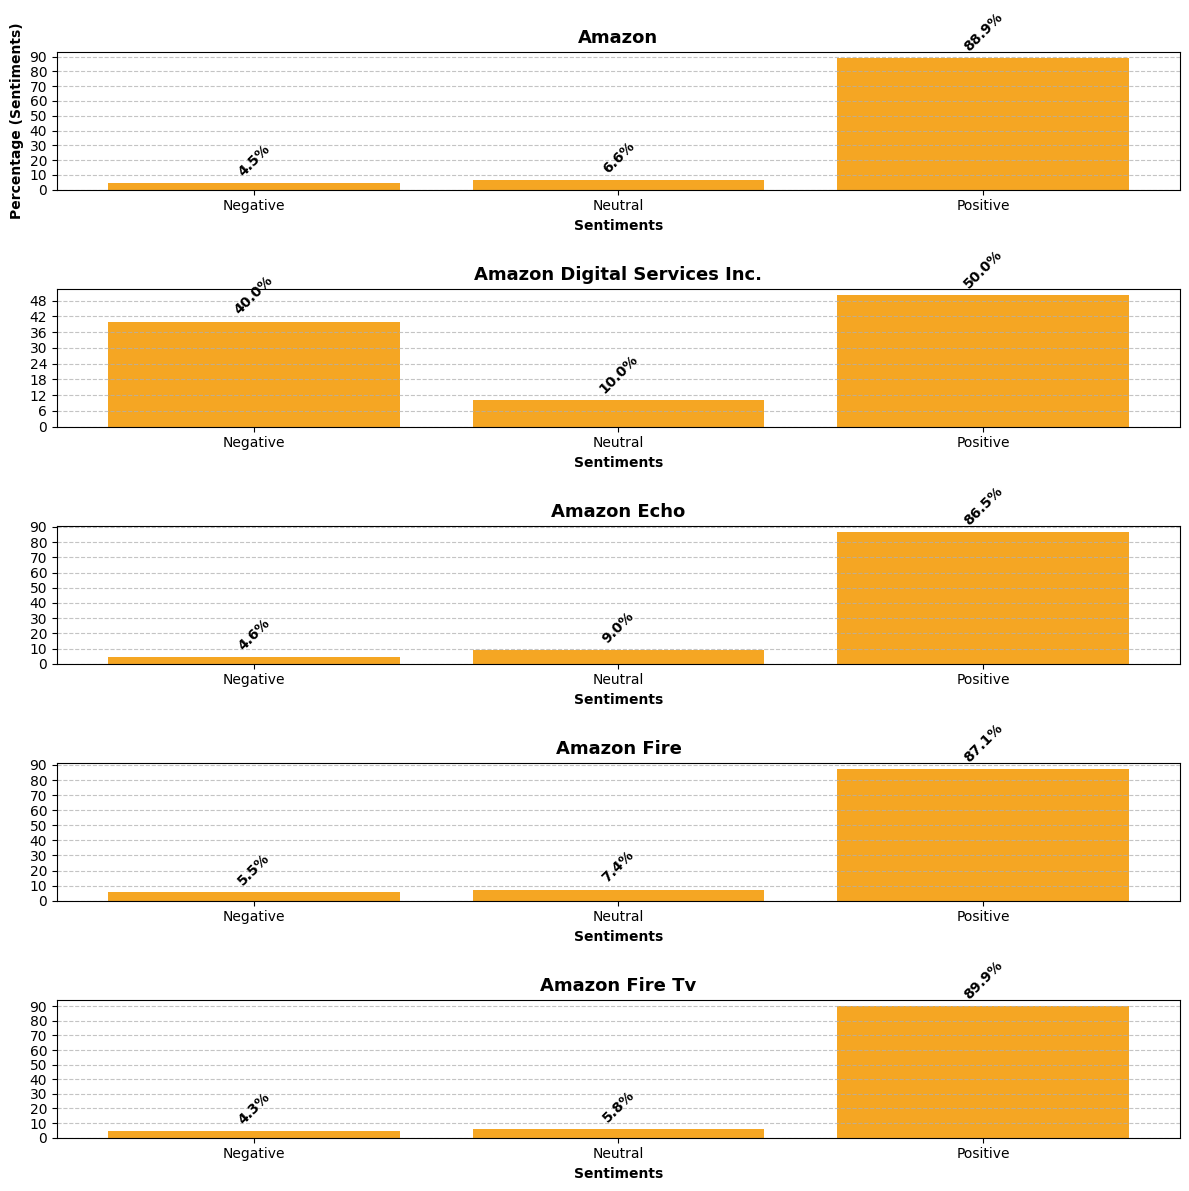

In [42]:
from matplotlib.ticker import MaxNLocator
sentiment_distribution = DatasetEmotion.groupby(['Brand', 'SentimentByBert']).size().unstack(fill_value=0)


selective_brands = ['Amazon', 'Amazon Digital Services Inc.', 'Amazon Echo', 'Amazon Fire', 'Amazon Fire Tv']

# Filter the DataFrame to include only the selective brands
sentiment_distribution = sentiment_distribution.loc[selective_brands]#Selecting only the mentioned brands, using loc, method which is used to filter.
sentiment_distribution = sentiment_distribution.sort_index()
brand_total_counts = sentiment_distribution.sum(axis=1)

sentiment_percentage = sentiment_distribution.div(brand_total_counts, axis=0) * 100
brands = sentiment_percentage.index.tolist()#converting to list
sentiments = sentiment_percentage.columns.tolist()

fig, axes = plt.subplots(len(selective_brands), 1, figsize=(12, 12))
for i, (brand, data) in enumerate(sentiment_percentage.iterrows()):
    bars = axes[i].bar(sentiments, data, color='#f5a623')
    axes[i].set_title(brand, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Sentiments', fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.75)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    for bar in bars:
        height = bar.get_height()
        axes[i].annotate('{:.1f}%'.format(height),
                         xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),
                         textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
axes[0].set_ylabel('Percentage (Sentiments)', fontweight='bold')
plt.tight_layout()#spacing
plt.show()

### Average rating by brand

In [ ]:
SentimentScoreByRating = DatasetEmotion.groupby('Brand')['Rating'].mean()
SentimentScoreByRating

Brand
Amazon                          4.566491
Amazon Coco T                        NaN
Amazon Digital Services Inc.    3.500000
Amazon Echo                     4.531447
Amazon Fire                     4.558594
Amazon Fire Tv                  4.707105
Name: Rating, dtype: float64

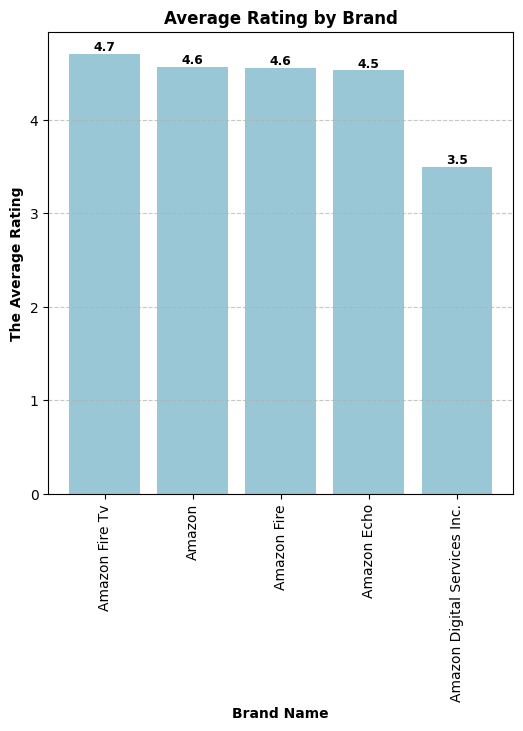

In [43]:
SentimentScoreByRating = DatasetEmotion.groupby('Brand')['Rating'].mean()
SentimentByRating = SentimentScoreByRating.sort_values(ascending=False)
plt.figure(figsize=(6, 6))

bars = plt.bar(SentimentByRating.index, SentimentByRating.values, color='#9ac7d6')
plt.xlabel('Brand Name', fontweight='bold')
plt.ylabel('The Average Rating', fontweight='bold')
plt.title('Average Rating by Brand', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Add the mean of each brand as text on top of the bars
for i, v in enumerate(SentimentByRating.values):
    plt.text(i, v, f'{v:.1f}', color='black', fontsize=8.9, fontweight='bold', ha='center', va='bottom')

plt.show()


In [ ]:
import nltk
nltk.download('punkt')#importing required libraries

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
#Initialized a list of negative words
NegativeWords = ['bad', 'poor', 'terrible', 'disappointing', 'slow','awful', 'horrible', 'negative', 'unpleasant', 'inferior','defective','faulty','overpriced','flawed','problematic','unsatisfactory','unreliable','misleading','low-quality','inconvenient','inefficient']
NegativeLabels = Dataset[Dataset['SentimentByBert'].isin(['Negative'])]

data = [] #Initialized empty list to store data

for index, row in NegativeLabels.iterrows(): #Iterate over each row.
  #Below,relevant information such as product name, brand, category and review text from the current row is extracted and stored.
    product_name = row['Product_Name']
    brand = row['Brand']
    category = row['Categories']
    review_text = row['Review_Text']

#word_tokenize function is used to tokenize reviews into individual words.
#lower() is used to make sure all words are in lower case. It is needed in order to compare with the NegativeWords list.
    words = word_tokenize(review_text.lower())

    negative_words = [] #Initialize empty list
    for word in words: #Iterate over each word
        if word in NegativeWords: #If the word is in the NegativeWords list, then it will add to the empty list negative_words
            negative_words.append(word)

    for word in negative_words: #Iterates over every word in negative_words and appends its relevant info.
        data.append((product_name, brand, category, review_text, word))

results_df = pd.DataFrame(data, columns=['Product Name', 'Brand', 'Category', 'Review_Text', 'Negative Word'])


In [45]:
results_df

Product Name           Brand  \
0    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
1    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
3    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
4    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
..                                                 ...             ...   
240                                                NaN  Amazon Fire Tv   
241                                                NaN  Amazon Fire Tv   
242                                                NaN  Amazon Fire Tv   
243                                                NaN  Amazon Fire Tv   
244                                                NaN  Amazon Fire Tv   

                                              Category  \
0    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
..                                                 ...   
240  Back To College,College Electronics,College Tv...   
241  Back To College,College Electronics,College Tv...   
242  Back To College,College Electronics,College Tv...   
243  Back To College,College Electronics,College Tv...   
244  Back To College,College Electronics,College Tv...   

                                           Review_Text   Negative Word  
0    If ads dont bother you, then this may be a dec...            slow  
1    Though I have got it for cheap price during bl...             bad  
2    I have always gone to buy a kindle because I l...      unreliable  
3    I exchanged a highly unsatisfactory Insignia u...  unsatisfactory  
4    I went with this tablet based on many good cus...            slow  
..                                                 ...             ...  
240  I own a high end system with AppleTV 3 and Chr...            poor  
241  I own a high end system with AppleTV 3 and Chr...             bad  
242  I was so excited to start streaming 4k with th...        terrible  
243  Pros:- Amazon Prime works on it.- You can stil...             bad  
244  I have 4 of the Gen 1 Fire Tv boxes and they a...        terrible  

[245 rows x 5 columns]

### **QUERIES FOR EMOTION ANALYSIS**

###Distribution of Emotions

In [48]:
query = "SELECT Emotion, COUNT(*) FROM DatasetEmotion GROUP BY Emotion"
cursor.execute(query)
EmotionCount = cursor.fetchall()
for emotion, count in EmotionCount:
    print(emotion, "Emotion: ", count)

anger Emotion:  193
disgust Emotion:  217
fear Emotion:  206
joy Emotion:  16787
neutral Emotion:  13977
sadness Emotion:  1029
surprise Emotion:  1846


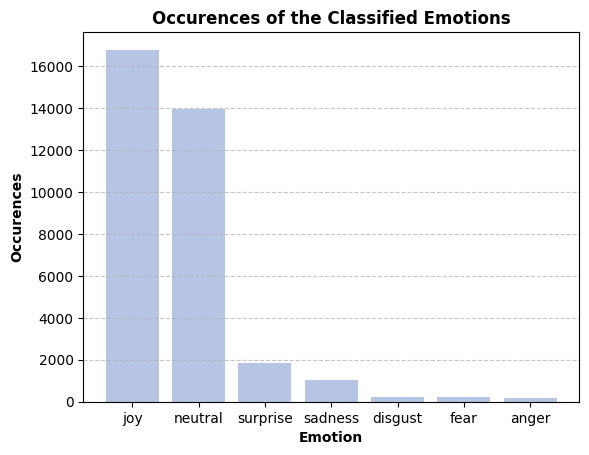

In [47]:
emotion_counts = DatasetEmotion['Emotion'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values,color='#b6c5e3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Emotion',fontweight='bold')
plt.ylabel('Occurences',fontweight='bold')
plt.title('Occurences of the Classified Emotions',fontweight='bold')
plt.show()

###Occurrences of each predicted emotion for a specific sentiment label:

In [ ]:
query = "SELECT Emotion, SentimentByBert, COUNT(SentimentByBert) AS sentiment_count FROM DatasetEmotion GROUP BY Emotion, SentimentByBert"
cursor.execute(query)
sentiment_counts = cursor.fetchall()
for brand, sentiment_label, count in sentiment_counts:
    print("\nEmotion:", brand, "\nSentiment Label:", sentiment_label, "\nSentiment Count:", count)


Emotion: anger 
Sentiment Label: Negative 
Sentiment Count: 63

Emotion: anger 
Sentiment Label: Neutral 
Sentiment Count: 15

Emotion: anger 
Sentiment Label: Positive 
Sentiment Count: 115

Emotion: disgust 
Sentiment Label: Negative 
Sentiment Count: 87

Emotion: disgust 
Sentiment Label: Neutral 
Sentiment Count: 60

Emotion: disgust 
Sentiment Label: Positive 
Sentiment Count: 70

Emotion: fear 
Sentiment Label: Negative 
Sentiment Count: 20

Emotion: fear 
Sentiment Label: Neutral 
Sentiment Count: 16

Emotion: fear 
Sentiment Label: Positive 
Sentiment Count: 170

Emotion: joy 
Sentiment Label: Negative 
Sentiment Count: 76

Emotion: joy 
Sentiment Label: Neutral 
Sentiment Count: 185

Emotion: joy 
Sentiment Label: Positive 
Sentiment Count: 16526

Emotion: neutral 
Sentiment Label: Negative 
Sentiment Count: 730

Emotion: neutral 
Sentiment Label: Neutral 
Sentiment Count: 1567

Emotion: neutral 
Sentiment Label: Positive 
Sentiment Count: 11680

Emotion: sadness 
Sentiment L

###Heat Map

The heatmap displays the number of occurrences where a specific predicted emotion label corresponds to a specific sentiment label in the dataset. It represents the count of data points that fall into each combination of emotion and sentiment labels.

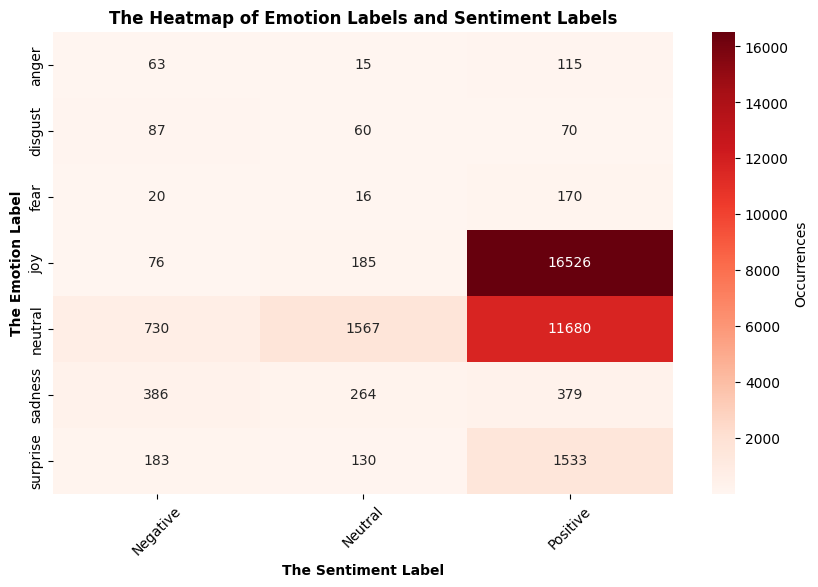

In [49]:
heatmap_data = pd.crosstab(DatasetEmotion['Emotion'], DatasetEmotion['SentimentByBert'])#used to compute a cross-tabulation of two variables

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Occurrences'})
plt.xlabel('The Sentiment Label',fontweight='bold')
plt.ylabel('The Emotion Label',fontweight='bold')
plt.title('The Heatmap of Emotion Labels and Sentiment Labels',fontweight='bold',fontsize=12)
plt.xticks(rotation=45)
plt.show()

###Name of Products with Emotion "anger" or "disgust" and Sentiment Label as "negative".

In [77]:
query = "SELECT Product_Name, COUNT(*) FROM DatasetEmotion WHERE Emotion IN ('disgust', 'anger') AND SentimentByBert = 'Negative' AND Product_Name IS NOT NULL GROUP BY Product_Name"
cursor.execute(query)
result = cursor.fetchall()

for product_name, count in result:
    print("\nProduct:", product_name, "- Count:", count)



Product: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta - Count: 9

Product: Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,, - Count: 1

Product: Amazon Fire Tv,,,
Amazon Fire Tv,,, - Count: 10

Product: Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,, - Count: 12

Product: Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,, - Count: 7

Product: Echo (White),,,
Echo (White),,, - Count: 14

Product: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case - Count: 12

Product: Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black - Count: 3

Product: Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta - Count: 47

Product: Kindle Oasis E-reader with Leather Chargin

# **Comparison of Sentiment Analysis and Emotion Analysis**

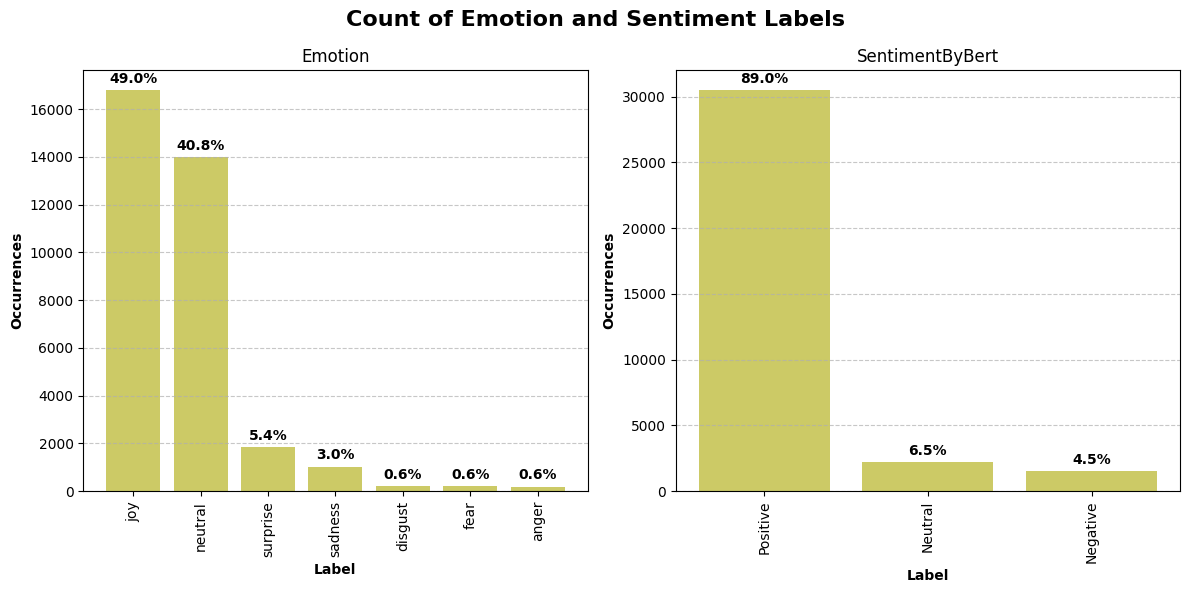

In [ ]:
categorical_columns = ['Emotion', 'SentimentByBert']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))#subplot

for i, col in enumerate(categorical_columns):
    category_counts = DatasetEmotion[col].value_counts()   # Counting the occurrences
    total_count = len(DatasetEmotion) #calculating percentages
    category_percentages = (category_counts / total_count) * 100

    bars = axes[i].bar(category_counts.index, category_counts, color='#ccca66')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Label', fontweight='bold')
    axes[i].set_ylabel('Occurrences', fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=90)

    for bar, percentage in zip(bars, category_percentages):
        height = bar.get_height()
        axes[i].annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Count of Emotion and Sentiment Labels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



---



# **COMPARISON OF MODELS**

In [50]:
uploaded = files.upload() #uploading the dataset file from computer to Google Colab
Dataset = pd.read_csv('DatasetEmotion.csv')

Saving DatasetEmotion.csv to DatasetEmotion (1).csv


<ipython-input-50-95fedcdcaa70>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset = pd.read_csv('DatasetEmotion.csv')


In [51]:
uploaded = files.upload()
df = pd.read_csv('df.csv')

Saving df.csv to df (1).csv


<ipython-input-51-52a98e26f041>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df.csv')


In [52]:
df[["Review_Text","sentiment"]] #vader

Review_Text sentiment
0      This product so far has not disappointed. My c...  Positive
1      great for beginner or experienced person. Boug...  Positive
2      Inexpensive tablet for him to use and learn on...  Positive
3      I've had my Fire HD 8 two weeks now and I love...  Positive
4      I bought this for my grand daughter when she c...  Positive
...                                                  ...       ...
34250  This is not appreciably faster than any other ...  Positive
34251  Amazon should include this charger with the Ki...  Positive
34252  Love my Kindle Fire but I am really disappoint...  Negative
34253  I was surprised to find it did not come with a...  Positive
34254  to spite the fact that i have nothing but good...  Positive

[34255 rows x 2 columns]

In [53]:
Dataset[["Review_Text","SentimentByBert"]] #bert

Review_Text SentimentByBert
0      This product so far has not disappointed. My c...        Positive
1      great for beginner or experienced person. Boug...        Positive
2      Inexpensive tablet for him to use and learn on...        Positive
3      I've had my Fire HD 8 two weeks now and I love...        Positive
4      I bought this for my grand daughter when she c...        Positive
...                                                  ...             ...
34250  This is not appreciably faster than any other ...        Positive
34251  Amazon should include this charger with the Ki...        Negative
34252  Love my Kindle Fire but I am really disappoint...         Neutral
34253  I was surprised to find it did not come with a...        Negative
34254  to spite the fact that i have nothing but good...        Negative

[34255 rows x 2 columns]

In [54]:
import nltk
nltk.download('punkt')#installing required library

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
from nltk.tokenize import word_tokenize

negative_word_list = ['bad', 'poor', 'terrible', 'disappointing', 'awful', 'horrible', 'inconvenient','negative', 'unpleasant', 'inferior','defective','faulty','overpriced','flawed','problematic','unsatisfactory','unreliable','misleading','low-quality','inconvenient','inefficient']
negative_df = df[df['sentiment'] == 'Negative']
data = []
for index, row in negative_df.iterrows():
    product_name = row['Product_Name']
    brand = row['Brand']
    category = row['Categories']
    review_text = row['Review_Text']
    words = word_tokenize(review_text.lower())

    negative_words = [word for word in words if word in negative_word_list]
    data.extend([(product_name, brand, category, review_text, word) for word in negative_words])

results_df1 = pd.DataFrame(data, columns=['Product Name', 'Brand', 'Category', 'Review_Text', 'Negative Word'])


In [56]:
NegativeWords = ['bad', 'poor', 'terrible', 'disappointing', 'slow','awful', 'horrible', 'negative', 'unpleasant', 'inferior','defective','faulty','overpriced','flawed','problematic','unsatisfactory','unreliable','misleading','low-quality','inconvenient','inefficient']
NegativeLabels = Dataset[Dataset['SentimentByBert'].isin(['Negative'])]

data = []
for index, row in NegativeLabels.iterrows():
    product_name = row['Product_Name']
    brand = row['Brand']
    category = row['Categories']
    review_text = row['Review_Text']

    words = word_tokenize(review_text.lower())
    negative_words = []
    for word in words:
        if word in NegativeWords:
            negative_words.append(word)

    for word in negative_words:
        data.append((product_name, brand, category, review_text, word))
results_df = pd.DataFrame(data, columns=['Product Name', 'Brand', 'Category', 'Review_Text', 'Negative Word'])


In [61]:
display("Negative word extraction of Bert model", results_df)

'Negative word extraction of Bert model'

Product Name           Brand  \
0    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
1    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
3    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
4    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
..                                                 ...             ...   
240                                                NaN  Amazon Fire Tv   
241                                                NaN  Amazon Fire Tv   
242                                                NaN  Amazon Fire Tv   
243                                                NaN  Amazon Fire Tv   
244                                                NaN  Amazon Fire Tv   

                                              Category  \
0    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
..                                                 ...   
240  Back To College,College Electronics,College Tv...   
241  Back To College,College Electronics,College Tv...   
242  Back To College,College Electronics,College Tv...   
243  Back To College,College Electronics,College Tv...   
244  Back To College,College Electronics,College Tv...   

                                           Review_Text   Negative Word  
0    If ads dont bother you, then this may be a dec...            slow  
1    Though I have got it for cheap price during bl...             bad  
2    I have always gone to buy a kindle because I l...      unreliable  
3    I exchanged a highly unsatisfactory Insignia u...  unsatisfactory  
4    I went with this tablet based on many good cus...            slow  
..                                                 ...             ...  
240  I own a high end system with AppleTV 3 and Chr...            poor  
241  I own a high end system with AppleTV 3 and Chr...             bad  
242  I was so excited to start streaming 4k with th...        terrible  
243  Pros:- Amazon Prime works on it.- You can stil...             bad  
244  I have 4 of the Gen 1 Fire Tv boxes and they a...        terrible  

[245 rows x 5 columns]

In [62]:
display("Negative word extraction of VADER model", results_df1)

'Negative word extraction of VADER model'

Product Name           Brand  \
0    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
1    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
3    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
4    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...          Amazon   
..                                                 ...             ...   
167                                                NaN  Amazon Fire Tv   
168                                                NaN  Amazon Fire Tv   
169                                                NaN  Amazon Fire Tv   
170                                                NaN  Amazon Fire Tv   
171                                                NaN  Amazon Fire Tv   

                                              Category  \
0    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4    Electronics,iPad & Tablets,All Tablets,Fire Ta...   
..                                                 ...   
167  Back To College,College Electronics,College Tv...   
168  Back To College,College Electronics,College Tv...   
169  Back To College,College Electronics,College Tv...   
170  Back To College,College Electronics,College Tv...   
171  Back To College,College Electronics,College Tv...   

                                           Review_Text Negative Word  
0    Though I have got it for cheap price during bl...           bad  
1    This is a good product for video, surfing and ...   problematic  
2    This is a good product for video, surfing and ...  inconvenient  
3    This is not a bad product. Amazon offers great...           bad  
4    I have always gone to buy a kindle because I l...    unreliable  
..                                                 ...           ...  
167  This device has been designed taking into acco...           bad  
168  This device has been designed taking into acco...      horrible  
169  Is a god but i have to pay 100 dollar a year i...           bad  
170  Pros:- Amazon Prime works on it.- You can stil...           bad  
171  You can go cheap and get the fire stick, but f...           bad  

[172 rows x 5 columns]

###Combing the results of bert and vader models together

In [59]:
MergedDataset = pd.concat([df, Dataset]) #Combining dataset with Vader model and Transformers Pipeline results together

# Comarison of Model with Ground Truth Dataset
For creating the ground truth dataset, a subset of dataset containing random 50 rows has been taken and manually labeled.

In [78]:
Ratingss = [1,2,3,4,5] #ratings
HumanLabelled = pd.DataFrame() #creating empty dataframe

for rating in Ratingss:
    rows_with_rating = Amazon_Dataset[Amazon_Dataset['Rating'] == rating] #filter rows with rating
    sampled_rows = rows_with_rating.sample(n=10, random_state=42)
    HumanLabelled = pd.concat([HumanLabelled, sampled_rows])#adds the sampled rows to the  empty HumanLabelled DataFrame.
HumanLabelled = HumanLabelled.reset_index(drop=True)#discards the old index values

In [79]:
Human_Labelled = HumanLabelled[['Review_Text', 'Rating']]
Human_Labelled = Human_Labelled.reset_index(drop=True)

In [80]:

# Save the DataFrame as a CSV file
Human_Labelled.to_csv('Human_Labelled.csv', index=False)

# Download the file
files.download('Human_Labelled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###After downloading the random 50 customer texts dataset, it is manually labeled to create a ground truth dataset.

In [63]:
#Uploading the dataset with manually labeled sentiments
uploaded = files.upload()
Human_LabelledSentiments = pd.read_csv('HumanLabel.csv')

Saving HumanLabel.csv to HumanLabel.csv


In [64]:
random_sample = Human_LabelledSentiments.sample(n=10, random_state=42)#randomly displaying 10 observations from the manually labled dataset
display(random_sample)

Review_Text  Rating  \
13  Bought it for my 5 yr old daughter and for som...       2   
39  would be nice with some simple start up direct...       4   
30  This product works great and it was a present ...       4   
45  GReat an fun product for the whole family. Kid...       5   
17  The earlier models were so simple to use. No n...       2   
48  I enjoy watching free movies, playing great ga...       5   
26  Its a good tablet for my 6 yr old to play game...       3   
25  Made a nice Mother's Day gift....................       3   
32  This is good for the price battery is good qua...       4   
19  Hi,I ordered this for my daughter who has an e...       2   

   SentimentLabelByHuman  
13              Negative  
39               Neutral  
30              Positive  
45              Positive  
17              Negative  
48              Positive  
26               Neutral  
25              Positive  
32              Positive  
19              Negative

# Comparison of Human Label and bert-base-multilingual-uncased-sentiment Model

In [11]:
from transformers import pipeline #importing the transformers pipeline
nlp = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
Human_LabelledSentiments =Human_LabelledSentiments

sentiment_labels = []
for index, row in Human_LabelledSentiments.iterrows(): #Loop to iterate on each row to process every text review
    text = row['Review_Text']  # Assuming the text data is in a column named 'Review_Text'

    #This line divides the "text" into chunks with a maximum of 512 characters.Splitting the text into smaller portions enables to do sentiment analysis on longer tests, when the model have a maximum input length.
    #The pipeline analyzes the review text in chunks because some models have a maximum input length, and splitting the text allows us to perform sentiment analysis on longer reviews.
    text_chunks = [text[i:i + 512] for i in range(0, len(text), 512)]


    chunk_results = []#Initializing empty list to store text chunks sentiment analysis results
    for chunk in text_chunks:#Loop to iterate on text chunk starts here
        result = nlp(chunk)#Perform Sentiment Analysis on current text chunk
        chunk_results.extend(result)#Adding sentiment analysis Results of each text chunk

#Here, the sentiment label and score is extracted from the last sentiment analysis results. If there is results and not empty, then it will be extracted and added to Sentiment_Label and Sentiment_Score. Else, No.
#Purpose of this is to avoid errors, so that in case of empty results, it assigns a value None to avoid any errors. It makes sure that it always has a value, even if it is
#'label' and 'score' are pre-defined keys in transformers pipeline to extract label and score.
    sentiment_label = chunk_results[-1]['label'] if chunk_results else "N/A"


    sentiment_labels.append(sentiment_label)   # Add Sentiment Label to the list initialized earlier


#Add new columns to the Dataset for the Sentiment Label and Score
Human_LabelledSentiments['Sentiment'] = sentiment_labels



No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [12]:
Human_LabelledSentiments['Sentiment'].replace({'5 stars': 'Positive', '4 stars': 'Positive', '3 stars': 'Neutral', '2 stars': 'Negative', '1 star': 'Negative'}, inplace=True)

In [13]:
Human_LabelledSentiments[['Sentiment','SentimentLabelByHuman']].sample(5)

Sentiment SentimentLabelByHuman
49  Positive              Positive
0   Negative              Negative
34  Positive              Positive
25  Positive              Positive
9    Neutral              Negative

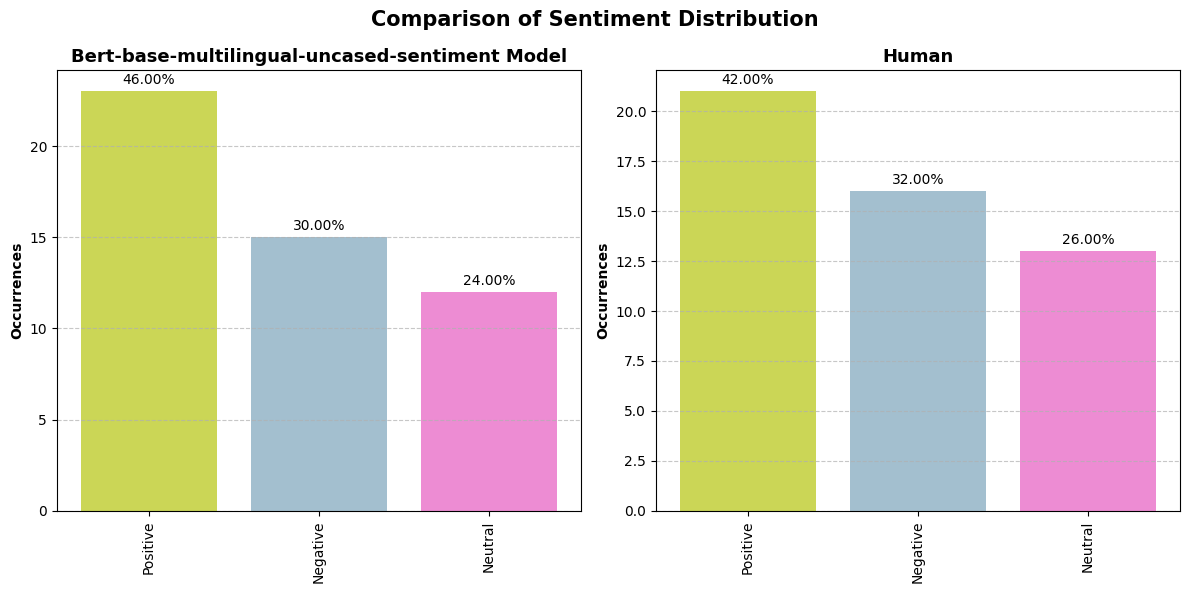

In [14]:
SentimentLabelColumns = ['Sentiment','SentimentLabelByHuman']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Subplot
colors = ['#cbd656', '#a3bfcf', '#ed8cd3']  # Colors

for i, col in enumerate(SentimentLabelColumns):
    category_counts = Human_LabelledSentiments[col].value_counts()  # Occurrences of each category
    total_count = len(Human_LabelledSentiments)
    category_percentages = (category_counts / total_count) * 100

    bars = axes[i].bar(category_counts.index, category_counts, color=colors)
    axes[i].set_ylabel('Occurrences', fontweight='bold')

    if col == 'SentimentLabelByHuman':
        axes[i].set_title("Human", fontsize=13, fontweight='bold')
    elif col == 'Sentiment':
        axes[i].set_title("Bert-base-multilingual-uncased-sentiment Model", fontsize=13, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.71)

    for bar, percentage in zip(bars, category_percentages):
        height = bar.get_height()
        axes[i].annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)

plt.suptitle('Comparison of Sentiment Distribution', fontsize=15, fontweight='bold')
plt.tight_layout()  # Spacing between plots
plt.show()

###Accuracy

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Human_LabelledSentiments['SentimentLabelByHuman'], Human_LabelledSentiments['Sentiment']) * 100
print(f'Accuracy of the Bert-base-multilingual-uncased-sentiment Model: {accuracy:.1f}%')

Accuracy of the Bert-base-multilingual-uncased-sentiment Model: 70.0%


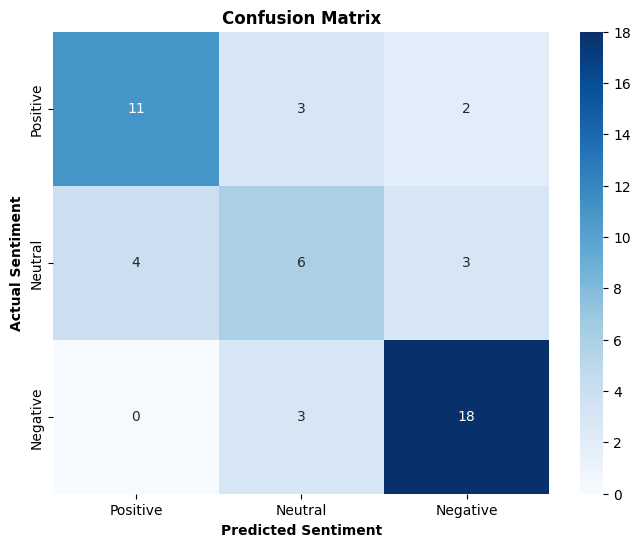

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

actual_sentiments = Human_LabelledSentiments['SentimentLabelByHuman']
predicted_sentiments = Human_LabelledSentiments['Sentiment']
conf_matrix = confusion_matrix(actual_sentiments, predicted_sentiments)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted Sentiment', fontweight='bold')
plt.ylabel('Actual Sentiment', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Comparison of Human Label and Vader Model

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Importing the Vader Sentiment library

analyser = SentimentIntensityAnalyzer() # Creating an instance of SentimentIntensityAnalyzer
#The SentimentIntensityAnalyzer is a pre-trained model that can analyse the sentiment of a given text sample.
#The overall sentiment score for the input text is determined by combining a lexicon of words that have already been pre-scored for their sentiment (positive, negative, or neutral) with a set of rules.

def sentiment_analyzer_scores(sentence): #Applying sentiment analysis
    score = analyser.polarity_scores(sentence) #Four sentiment scores—compound, pos, neu, and neg—are returned by the function polarity_scores(), which takes a sentence as input.
    compound_score = score['compound'] #Compound score represents the overall sentiment of a given text
    if compound_score > 0:
        sentiment = 'Positive'
    elif compound_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment
#The positive score represents the amount of positive words in text
#The negative score represents the amount of negative words in text
#The neutral score represents the amount of neutral words in text

Human_LabelledSentiments[['SentimentByVader']] = Human_LabelledSentiments['Review_Text'].apply(sentiment_analyzer_scores).apply(pd.Series)


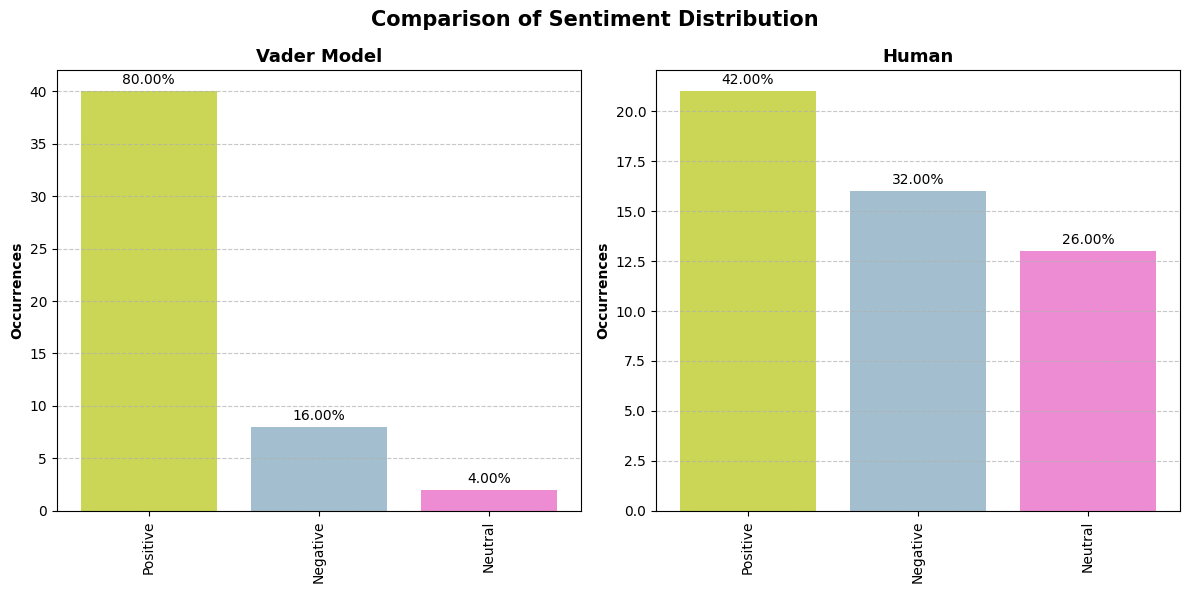

In [21]:
SentimentLabelColumns = ['SentimentByVader','SentimentLabelByHuman']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Subplot
colors = ['#cbd656', '#a3bfcf', '#ed8cd3']  # Colors

for i, col in enumerate(SentimentLabelColumns):
    category_counts = Human_LabelledSentiments[col].value_counts()  # Occurrences of each category
    total_count = len(Human_LabelledSentiments)
    category_percentages = (category_counts / total_count) * 100

    bars = axes[i].bar(category_counts.index, category_counts, color=colors)
    axes[i].set_ylabel('Occurrences', fontweight='bold')

    if col == 'SentimentLabelByHuman':
        axes[i].set_title("Human", fontsize=13, fontweight='bold')
    elif col == 'SentimentByVader':
        axes[i].set_title("Vader Model", fontsize=13, fontweight='bold')

    axes[i].grid(axis='y', linestyle='--', alpha=0.71)

    # Annotate each bar with its corresponding percentage
    for bar, percentage in zip(bars, category_percentages):
        height = bar.get_height()
        axes[i].annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=90)
plt.suptitle('Comparison of Sentiment Distribution', fontsize=15, fontweight='bold')
plt.tight_layout()  # Spacing between plots
plt.show()


###Accuracy

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Human_LabelledSentiments['SentimentLabelByHuman'], Human_LabelledSentiments['SentimentByVader']) * 100
print(f'Accuracy of the VADER Model: {accuracy:.1f}%')

Accuracy of the VADER Model: 56.0%


In [23]:
pip install scikit-learn

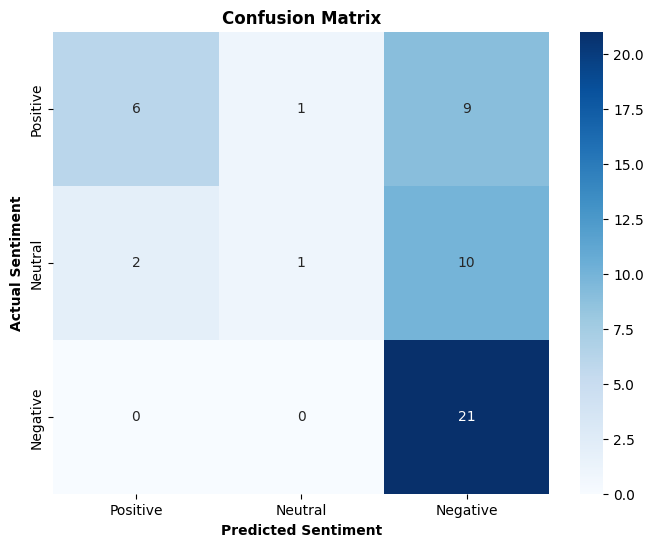

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
actual_sentiments = Human_LabelledSentiments['SentimentLabelByHuman']
predicted_sentiments = Human_LabelledSentiments['SentimentByVader']
conf_matrix = confusion_matrix(actual_sentiments, predicted_sentiments)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted Sentiment', fontweight='bold')
plt.ylabel('Actual Sentiment', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

From the comparison, it is found that Bert-base-multilingual-uncased-sentiment Model has performed better in comparison to VADER model when compared with Human Labeled results.

**** THE END ****



---

